# 데이터로드 및 전처리

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [3]:
# import oracledb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from matplotlib.ticker import StrMethodFormatter,FormatStrFormatter
pd.options.display.float_format = '{:.5f}'.format
plt.style.use("seaborn-whitegrid")
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

In [8]:
df1=pd.read_csv("/content/drive/MyDrive/A하금티/jeonse_data_processed.csv",encoding='utf-8')

In [4]:
df2=pd.read_csv("/content/drive/MyDrive/A하금티/data/finaldf_최최최최최종.csv",encoding='utf-8')

In [ ]:
finaldf.drop(columns='Unnamed: 0',inplace=True)

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56471 entries, 0 to 56470
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                56471 non-null  int64  
 1   value                     56471 non-null  float64
 2   발생                        56471 non-null  int64  
 3   검거                        56471 non-null  int64  
 4   cggNm                     56471 non-null  object 
 5   stdgNm                    56471 non-null  object 
 6   mno                       56471 non-null  int64  
 7   sno                       56471 non-null  int64  
 8   flr                       56471 non-null  float64
 9   rentArea                  56471 non-null  float64
 10  grfe                      56471 non-null  int64  
 11  bldgUsg                   56471 non-null  int64  
 12  lat                       56471 non-null  float64
 13  lon                       56471 non-null  float64
 14  500m_내

In [6]:
describe_df=df2.describe()
describe_df[['']]

,Unnamed: 0,value,발생,검거,mno,sno,flr,rentArea,grfe,bldgUsg,lat,lon,500m_내_초중등수,500m_내_bus수,500m_내_마트수,Closest_Station_Distance,500m_내_경찰서수
count,56471.00000,56471.00000,56471.00000,56471.00000,56471.00000,56471.00000,56471.00000,56471.00000,56471.00000,56471.00000,56471.00000,56471.00000,56471.00000,56471.00000,56471.00000,56471.00000,56471.00000
mean,28235.00000,3.48777,5155.17652,3645.89917,543.95824,14.21147,7.61793,61.88782,47391.31634,3.00000,37.23304,126.05330,2.45050,17.23991,1.19229,98.33341,0.96428
std,16301.91786,0.05483,1239.91930,953.04432,442.51298,48.66289,5.91965,31.73510,34665.10516,0.00000,3.22316,10.91222,1.68729,7.95655,1.20824,1129.71449,0.82134
min,0.00000,3.00000,2735.00000,1741.00000,0.00000,0.00000,-1.00000,10.05000,1000.00000,3.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.02349,0.00000
25%,14117.50000,3.50000,4663.00000,3409.00000,151.00000,0.00000,3.00000,34.44000,22500.00000,3.00000,37.48969,126.87078,1.00000,12.00000,0.00000,0.31583,0.00000
50%,28235.00000,3.50000,5167.00000,3411.00000,508.00000,0.00000,6.00000,59.85000,38000.00000,3.00000,37.50361,127.03742,2.00000,16.00000,1.00000,0.47805,1.00000
75%,42352.50000,3.50000,5167.00000,3591.00000,776.50000,9.00000,11.00000,84.82000,62000.00000,3.00000,37.53121,127.09928,3.00000,21.00000,2.00000,0.67775,1.00000
max,56470.00000,3.50000,6947.00000,5020.00000,1746.00000,1434.00000,68.00000,273.96000,580000.00000,3.00000,37.58075,127.15911,12.00000,58.00000,9.00000,13148.97527,4.00000


In [8]:
df2['500m_내_초중등수'].quantile(0.75)

3.0

In [20]:
def graph():
  return

bldgUsg
3    56471
Name: count, dtype: int64

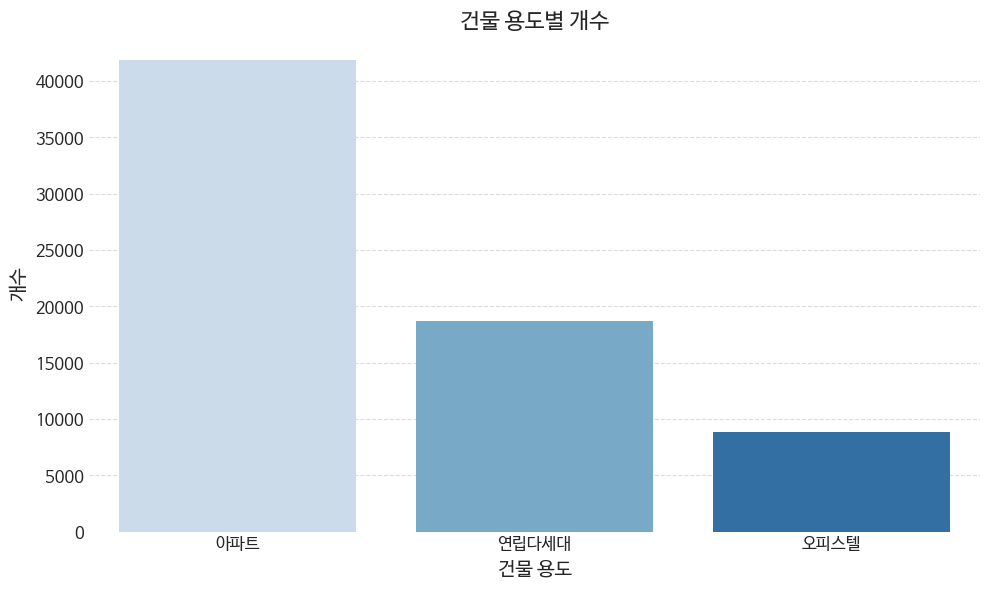

In [5]:
# bldgUsg 열의 값 개수 계산
counts = df1['bldgUsg'].value_counts()

# 시각화
plt.figure(figsize=(10, 6))
plt.rc('font', family='NanumBarunGothic')
sns.barplot(x=counts.index, y=counts.values, palette="Blues")
plt.title('건물 용도별 개수', fontsize=16)
plt.xlabel('건물 용도', fontsize=14)
plt.ylabel('개수', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.box(False)
plt.tight_layout()

# 그래프 출력
plt.show()

In [17]:
finaldf=pd.read_csv("/content/drive/MyDrive/A하금티/data/finaldf.csv",encoding='utf-8')

In [20]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56471 entries, 0 to 56470
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                56471 non-null  int64  
 1   value                     56471 non-null  float64
 2   발생                        56471 non-null  int64  
 3   검거                        56471 non-null  int64  
 4   cggCd                     56471 non-null  int64  
 5   stdgCd                    56471 non-null  int64  
 6   mno                       56471 non-null  int64  
 7   sno                       56471 non-null  int64  
 8   flr                       56471 non-null  float64
 9   ctrtDay                   56471 non-null  int64  
 10  rentArea                  56471 non-null  float64
 11  grfe                      56471 non-null  int64  
 12  rtfe                      56471 non-null  int64  
 13  bldgUsg                   56471 non-null  object 
 14  newUpd

In [22]:
# bldgUsg 변환함수
def convert_new_bldgUsg(bldgUsg):
    if bldgUsg == '아파트':
        return 1
    elif bldgUsg == '연립다세대':
        return 2
    else:
        return 3  # 예외 처리

finaldf['bldgUsg'] = finaldf['bldgUsg'].apply(convert_new_bldgUsg)

In [24]:
finaldf.drop(columns='Unnamed: 0',inplace=True)

<Axes: >

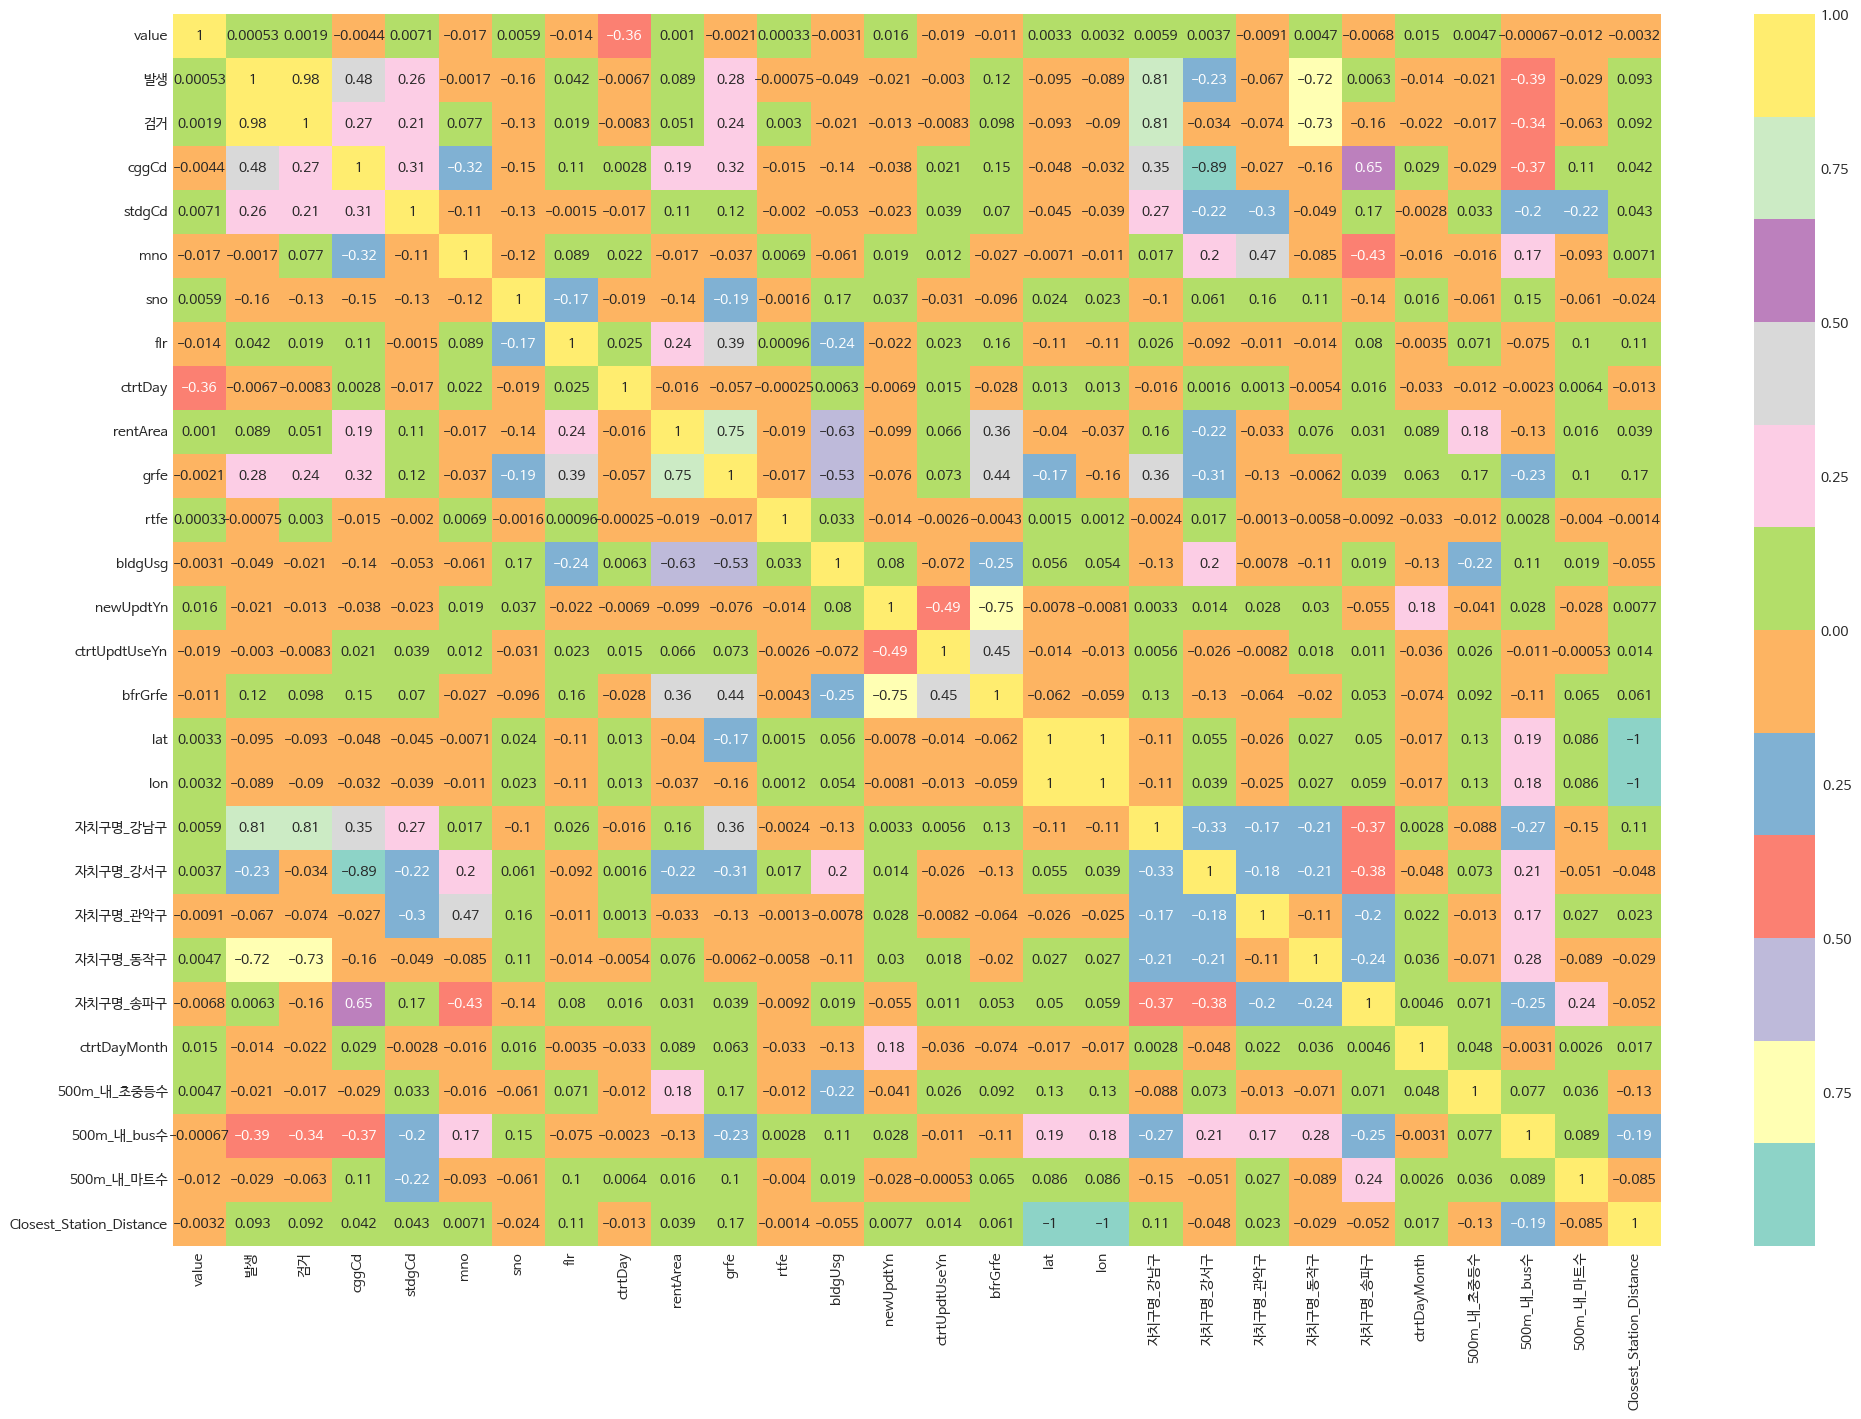

In [66]:
plt.figure(figsize=(24,16))
sns.heatmap(finaldf.corr(), annot=True, cmap="Set3")

In [30]:
df2

,value,발생,검거,cggNm,stdgNm,mno,sno,flr,rentArea,grfe,bldgUsg,lat,lon,500m_내_초중등수,500m_내_bus수,500m_내_마트수,Closest_Station_Distance,500m_내_경찰서수
0,3.50000,4879,3411,관악구,남현동,1061,18,14.00000,28.05000,16500,3,37.47450,126.98139,0,10,1,0.22666,2
1,3.25000,4879,3411,관악구,신림동,1435,7,2.00000,19.50000,10000,3,37.48561,126.92733,1,28,2,0.26297,2
2,3.50000,4879,3411,관악구,신림동,1462,12,4.00000,21.84000,13000,3,37.48624,126.92446,1,27,0,0.51707,3
3,3.50000,4879,3411,관악구,봉천동,1564,1,3.00000,17.40000,7000,3,37.47977,126.94463,3,20,1,0.37567,0
4,3.50000,4879,3411,관악구,신림동,1419,9,3.00000,27.32000,15000,3,37.48661,126.93106,1,32,2,0.29274,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56466,3.50000,4663,3591,강서구,화곡동,424,23,4.00000,31.68000,16000,3,37.53139,126.84178,0,16,1,0.43580,1
56467,3.50000,4663,3591,강서구,화곡동,105,357,5.00000,24.30000,21500,3,37.54202,126.84232,3,26,2,0.17364,1
56468,3.50000,4663,3591,강서구,화곡동,1091,0,11.00000,84.94000,61000,3,37.54462,126.83144,6,4,0,0.63036,2
56469,3.50000,4663,3591,강서구,화곡동,410,296,4.00000,46.77000,12500,3,37.53760,126.84966,1,35,0,0.69853,1


In [38]:
cggNm_grfe = df2.groupby('cggNm')['grfe'].mean().reset_index().sort_values(by='grfe')
cggNm_grfe

,cggNm,grfe
1,강서구,29206.36242
2,관악구,32992.11238
3,동작구,46808.00940
4,송파구,49463.31552
0,강남구,69262.15953


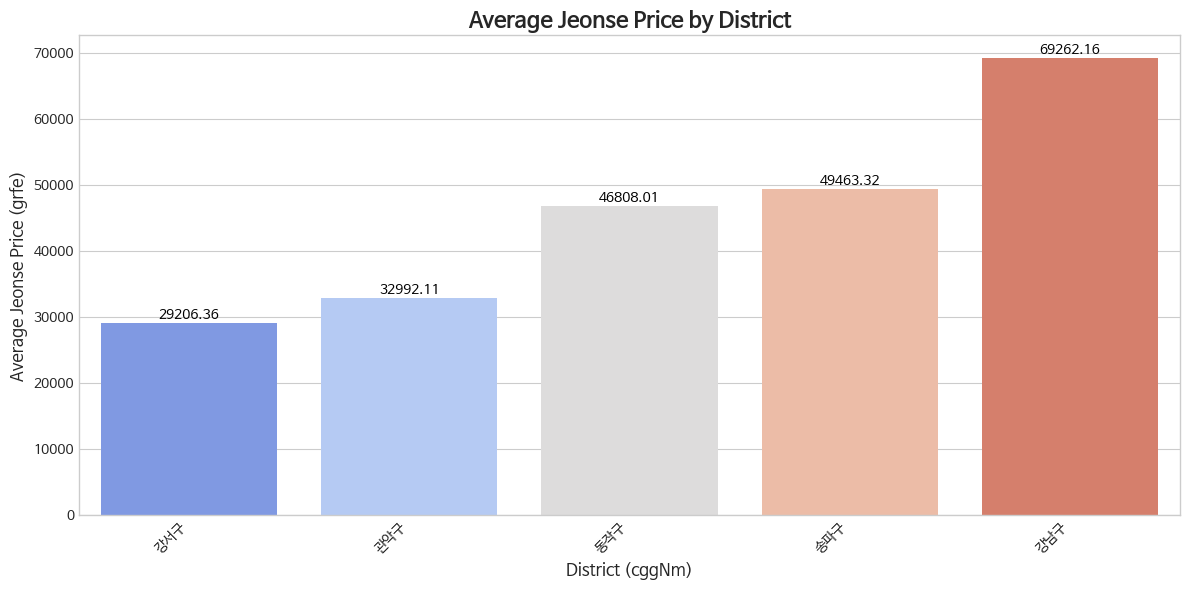

In [44]:
# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(data=cggNm_grfe, x="cggNm", y="grfe", palette="coolwarm", order=cggNm_grfe["cggNm"])

# Add titles and labels
plt.title('Average Jeonse Price by District', fontsize=16, weight='bold')
plt.xlabel('District (cggNm)', fontsize=12)
plt.ylabel('Average Jeonse Price (grfe)', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of the bars
for i, value in enumerate(cggNm_grfe['grfe']):
    plt.text(i, value + 0.5, round(value, 2), ha='center', va='bottom', fontsize=10, color='black')

# Adjust the layout to make room for the rotated x-axis labels
plt.tight_layout()

# Show the plot
plt.show()

<Axes: xlabel='cggNm', ylabel='grfe'>

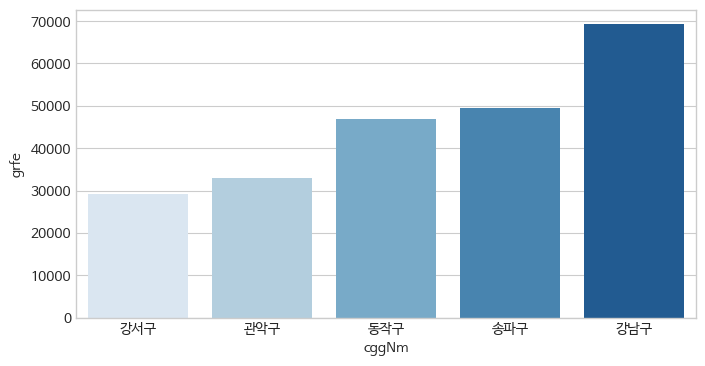

In [40]:
plt.figure(figsize=(8,4))
sns.barplot(data=cggNm_grfe, x="cggNm", y="grfe", palette="Blues", order=cggNm_grfe["cggNm"])

In [49]:
stdgNm_grfe

,stdgNm,grfe
38,외발산동,14266.66667
4,공항동,20162.02048
46,화곡동,24323.59312
24,상도1동,24530.63492
23,삼전동,24854.13199
15,마천동,25878.10855
18,방화동,27435.54161
26,석촌동,27503.80364
31,신림동,27634.37381
13,등촌동,29515.14060


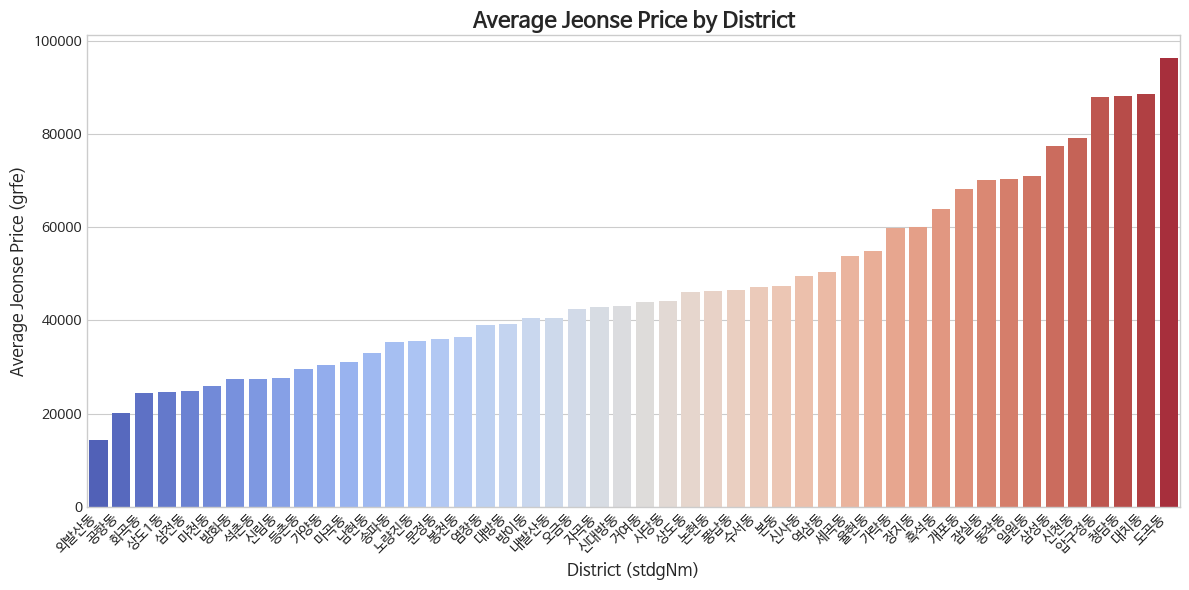

In [54]:
stdgNm_grfe = df2.groupby('stdgNm')['grfe'].mean().reset_index().sort_values(by='grfe')
stdgNm_grfe

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(data=stdgNm_grfe, x="stdgNm", y="grfe", palette="coolwarm", order=stdgNm_grfe["stdgNm"])

# Add titles and labels
plt.title('Average Jeonse Price by District', fontsize=16, weight='bold')
plt.xlabel('District (stdgNm)', fontsize=12)
plt.ylabel('Average Jeonse Price (grfe)', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust the layout to make room for the rotated x-axis labels
plt.tight_layout()

# Show the plot
plt.show()

In [58]:
# 구 기준으로 groupby 후 정렬
apart_df_group = df2.groupby("flr")["grfe"].mean().reset_index().sort_values(by="grfe")
apart_df_group

,flr,grfe
0,-1.00000,13543.35974
2,2.00000,35097.78704
3,3.00000,35167.88902
4,4.00000,37523.84990
5,5.00000,40983.08867
1,1.00000,42479.61512
6,6.00000,46666.29261
7,7.00000,49096.51749
8,8.00000,49911.15097
10,10.00000,51247.81093


In [61]:
def flr_converter(x) :
    if x >= 1 and x <= 5 :
        return "low"
    elif x >=6 and x <= 13 :
        return "mid"
    elif x >= 14 and x <= 30 :
        return "high"
    else :
        return "very high"

In [ ]:
apart_df = df[df["bldgUsg"] == "아파트"]

In [ ]:
# 구 기준으로 groupby 후 정렬
apart_df_group = apart_df.groupby("flr_cat")["grfe"].mean().reset_index().sort_values(by="grfe")

In [67]:
apart_df= df2["flr"].apply( lambda x : flr_converter(x))

In [70]:
apart_df

0        high
1         low
2         low
3         low
4         low
         ... 
56466     low
56467     low
56468     mid
56469     low
56470     mid
Name: flr, Length: 56471, dtype: object

In [71]:
df2

,value,발생,검거,cggNm,stdgNm,mno,sno,flr,rentArea,grfe,bldgUsg,lat,lon,500m_내_초중등수,500m_내_bus수,500m_내_마트수,Closest_Station_Distance,500m_내_경찰서수,flr_cat
0,3.50000,4879,3411,관악구,남현동,1061,18,14.00000,28.05000,16500,3,37.47450,126.98139,0,10,1,0.22666,2,high
1,3.25000,4879,3411,관악구,신림동,1435,7,2.00000,19.50000,10000,3,37.48561,126.92733,1,28,2,0.26297,2,low
2,3.50000,4879,3411,관악구,신림동,1462,12,4.00000,21.84000,13000,3,37.48624,126.92446,1,27,0,0.51707,3,low
3,3.50000,4879,3411,관악구,봉천동,1564,1,3.00000,17.40000,7000,3,37.47977,126.94463,3,20,1,0.37567,0,low
4,3.50000,4879,3411,관악구,신림동,1419,9,3.00000,27.32000,15000,3,37.48661,126.93106,1,32,2,0.29274,2,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56466,3.50000,4663,3591,강서구,화곡동,424,23,4.00000,31.68000,16000,3,37.53139,126.84178,0,16,1,0.43580,1,low
56467,3.50000,4663,3591,강서구,화곡동,105,357,5.00000,24.30000,21500,3,37.54202,126.84232,3,26,2,0.17364,1,low
56468,3.50000,4663,3591,강서구,화곡동,1091,0,11.00000,84.94000,61000,3,37.54462,126.83144,6,4,0,0.63036,2,mid
56469,3.50000,4663,3591,강서구,화곡동,410,296,4.00000,46.77000,12500,3,37.53760,126.84966,1,35,0,0.69853,1,low


In [74]:
infra_df = df2.groupby("cggNm")[["500m_내_초중등수", "500m_내_bus수", "500m_내_마트수","500m_내_경찰서수"]].mean().reset_index()

In [ ]:
df_melted = infra_df.melt(id_vars='cggCd', var_name='Category', value_name='Value')

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='cggCd', y='Value', hue='Category')
plt.title('cggCd 별 500m 내 초중등수, bus 수, 마트 수')
plt.xlabel('cggCd')
plt.ylabel('수치')
plt.legend(title='카테고리')
plt.show()

In [78]:
infra_df

,cggNm,500m_내_초중등수,500m_내_bus수,500m_내_마트수,500m_내_경찰서수
0,강남구,2.18590,13.47374,0.86757,0.57062
1,강서구,2.66019,20.09033,1.08768,1.02999
2,관악구,2.37913,21.83227,1.30089,1.36450
3,동작구,2.12189,23.35536,0.89975,1.08190
4,송파구,2.63380,14.17355,1.62430,1.06621


In [80]:
df_melted = infra_df.melt(id_vars='cggNm', var_name='Category', value_name='Value')

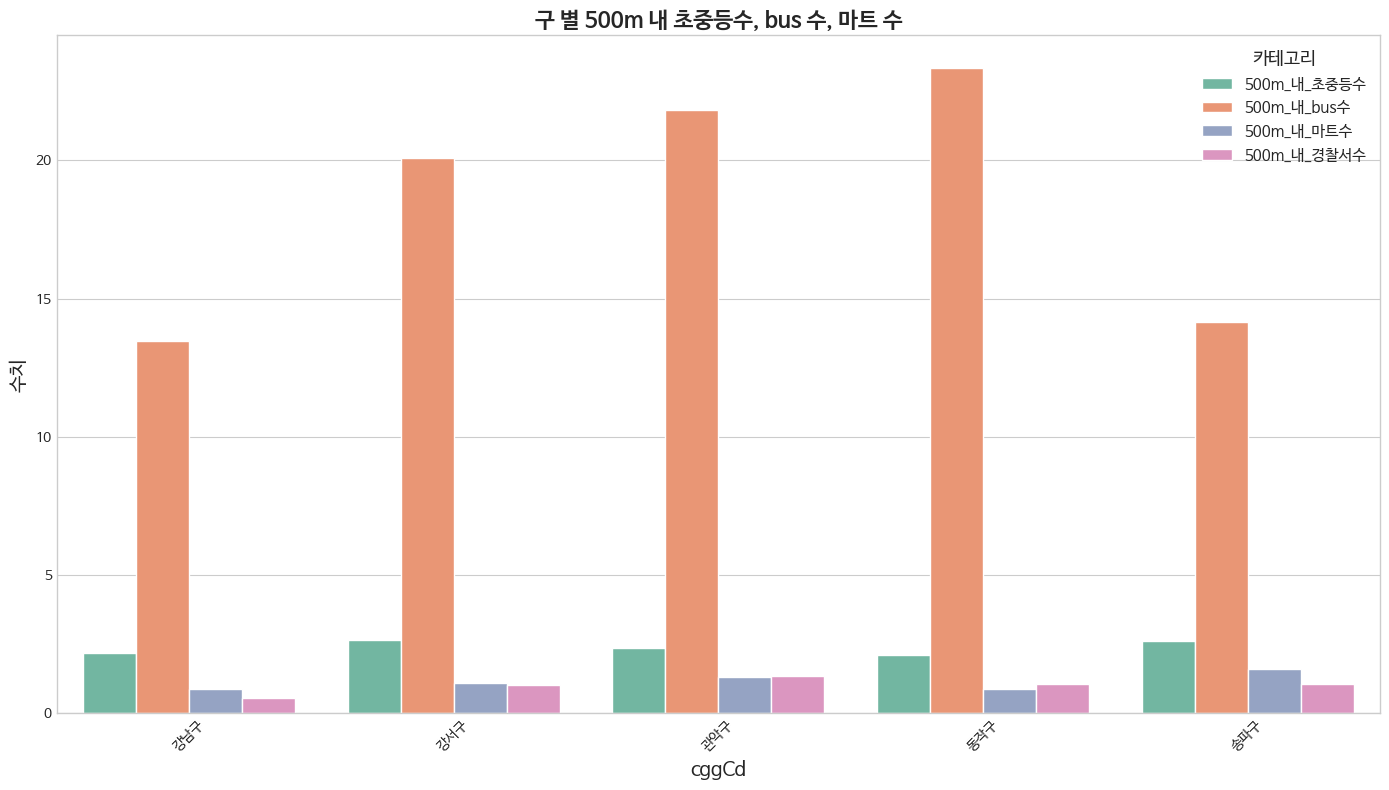

In [83]:
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))
plt.rc('font', family='NanumBarunGothic')

# Create a barplot
barplot = sns.barplot(data=df_melted, x='cggNm', y='Value', hue='Category', palette="Set2")

# Title and labels
plt.title('구 별 500m 내 초중등수, bus 수, 마트 수', fontsize=16, weight='bold')
plt.xlabel('cggCd', fontsize=14)
plt.ylabel('수치', fontsize=14)
plt.xticks(rotation=45)

# Improve the legend
plt.legend(title='카테고리', title_fontsize='13', fontsize='11')

# Enhance the layout
plt.tight_layout()

# Show plot
plt.show()

In [87]:
 safety_df=df2.groupby("cggNm")["발생"].mean().reset_index().sort_values(by="발생")
 safety_df

,cggNm,발생
3,동작구,2735.00000
1,강서구,4663.00000
2,관악구,4879.00000
4,송파구,5167.00000
0,강남구,6947.00000


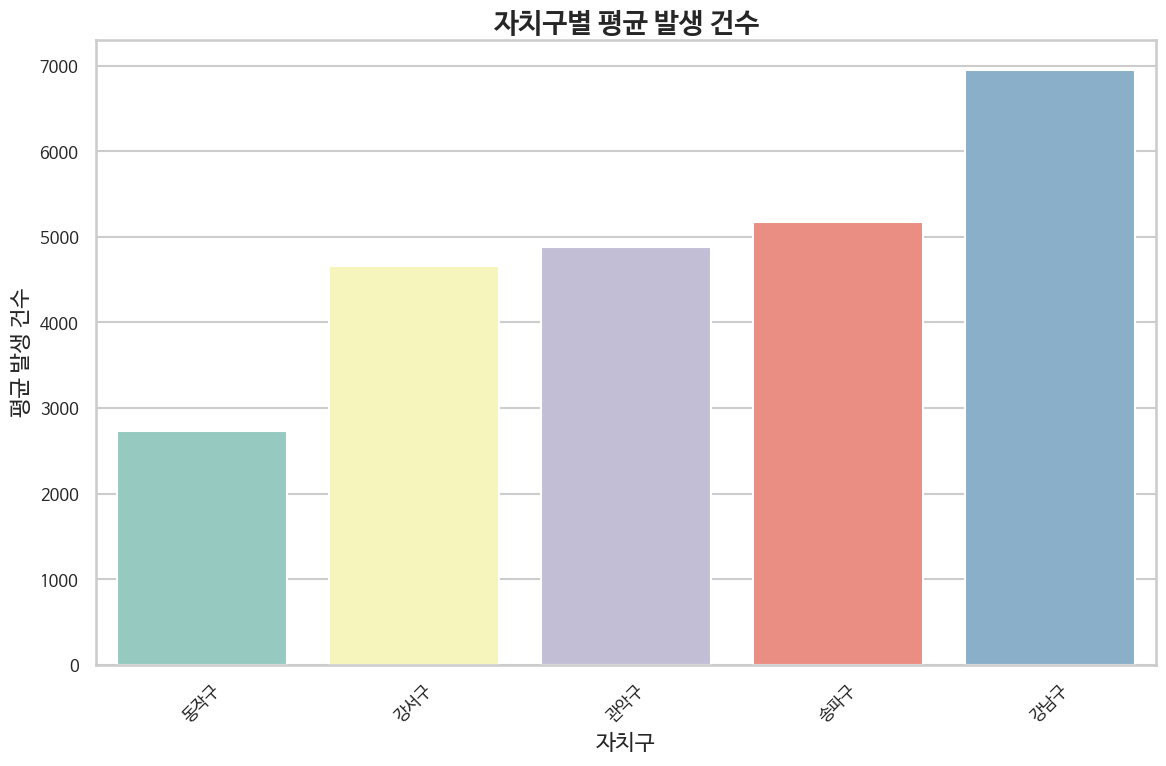

In [90]:
sns.set_style("whitegrid")
sns.set_context("talk")

# Create a figure and a set of subplots
plt.figure(figsize=(12, 8))
plt.rc('font', family='NanumBarunGothic')
# Create a bar plot
barplot = sns.barplot(data=safety_df, x='cggNm', y='발생', palette="Set3")

# Add title and labels
plt.title('자치구별 평균 발생 건수', fontsize=20, weight='bold')
plt.xlabel('자치구', fontsize=16)
plt.ylabel('평균 발생 건수', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Enhance the layout
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
# 필터링할 자치구명
desired_gu = ['관악구', '송파구', '강서구', '강남구', '동작구']

# 자치구명 필터링
filtered_df = df[df['자치구명'].isin(desired_gu)]

# 결과 출력
print(filtered_df)

        접수년도  자치구코드 자치구명  법정동코드 법정동명  지번구분코드 지번구분         본번       부번  \
6       2023  11590  동작구  10700  사당동 1.00000   대지 1007.00000 19.00000   
9       2023  11620  관악구  10300  남현동 1.00000   대지 1061.00000 18.00000   
10      2023  11620  관악구  10300  남현동 1.00000   대지 1061.00000 18.00000   
12      2023  11620  관악구  10300  남현동 1.00000   대지 1061.00000 18.00000   
15      2023  11620  관악구  10300  남현동 1.00000   대지 1061.00000 18.00000   
...      ...    ...  ...    ...  ...     ...  ...        ...      ...   
199618  2023  11710  송파구  11300  거여동 1.00000   대지  599.00000  0.00000   
199621  2023  11710  송파구  11300  거여동 1.00000   대지  599.00000  0.00000   
199622  2023  11710  송파구  11300  거여동 1.00000   대지  599.00000  0.00000   
199638  2023  11710  송파구  11300  거여동 1.00000   대지  599.00000  0.00000   
199639  2023  11710  송파구  11300  거여동 1.00000   대지  599.00000  0.00000   

              층  ...            건물명       건축년도  건물용도         계약기간  신규계약구분  \
6       5.00000  ...  \t(1007-19)\t 2002.00000

In [ ]:
filtered_df.자치구명.value_counts()

자치구명
송파구    18013
강남구    15646
강서구    14508
관악구     9822
동작구     7604
Name: count, dtype: int64

In [ ]:
newdf=filtered_df[filtered_df['건물용도']!='단독다가구']
newdf

,접수년도,자치구코드,자치구명,법정동코드,법정동명,지번구분코드,지번구분,본번,부번,층,...,보증금(만원),임대료(만원),건물명,건축년도,건물용도,계약기간,신규계약구분,갱신청구권사용,종전보증금,종전임대료
6,2023,11590,동작구,10700,사당동,1.00000,대지,1007.00000,19.00000,5.00000,...,14000,22,\t(1007-19)\t,2002.00000,오피스텔,23.06~25.06,신규,NaN,0.00000,0.00000
9,2023,11620,관악구,10300,남현동,1.00000,대지,1061.00000,18.00000,14.00000,...,16500,0,\t(1061-18)\t,2005.00000,오피스텔,23.08~24.08,신규,NaN,0.00000,NaN
10,2023,11620,관악구,10300,남현동,1.00000,대지,1061.00000,18.00000,10.00000,...,1000,72,\t(1061-18)\t,2005.00000,오피스텔,23.07~25.06,신규,NaN,0.00000,0.00000
12,2023,11620,관악구,10300,남현동,1.00000,대지,1061.00000,18.00000,7.00000,...,1000,70,\t(1061-18)\t,2005.00000,오피스텔,23.02~24.02,신규,NaN,0.00000,0.00000
15,2023,11620,관악구,10300,남현동,1.00000,대지,1061.00000,18.00000,13.00000,...,1000,70,\t(1061-18)\t,2005.00000,오피스텔,23.02~24.02,신규,NaN,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199618,2023,11710,송파구,11300,거여동,1.00000,대지,599.00000,0.00000,2.00000,...,3903,25,위례포레샤인13단지,2020.00000,아파트,NaN,NaN,NaN,NaN,NaN
199621,2023,11710,송파구,11300,거여동,1.00000,대지,599.00000,0.00000,15.00000,...,6582,10,위례포레샤인13단지,2020.00000,아파트,NaN,신규,NaN,0.00000,0.00000
199622,2023,11710,송파구,11300,거여동,1.00000,대지,599.00000,0.00000,4.00000,...,3903,25,위례포레샤인13단지,2020.00000,아파트,NaN,NaN,NaN,NaN,NaN
199638,2023,11710,송파구,11300,거여동,1.00000,대지,599.00000,0.00000,7.00000,...,2762,47,위례포레샤인13단지,2020.00000,아파트,NaN,신규,NaN,0.00000,0.00000


In [ ]:
newdf.drop(columns='종전임대료',inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

newdf['법정동명'] = le.fit_transform(newdf['법정동명'])

newdf['법정동명'].head(10)

6     21
9      5
10     5
12     5
15     5
20    31
21     5
22     5
23     5
24     5
Name: 법정동명, dtype: int64

# 2. 데이터로드

In [ ]:
input_df=pd.read_csv("/content/drive/MyDrive/A하금티/jeonse_data_processed.csv",encoding='utf-8')

In [ ]:
newdf=pd.read_csv("/content/drive/MyDrive/A하금티/newdata.csv",encoding='utf-8')

In [ ]:
newdf

,Unnamed: 0,cggCd,stdgCd,mno,sno,flr,ctrtDay,rentArea,grfe,rtfe,...,ctrtUpdtUseYn,bfrGrfe,lat,lon,자치구명_강남구,자치구명_강서구,자치구명_관악구,자치구명_동작구,자치구명_송파구,ctrtDayMonth
0,0,11620,10300,1061,18,14.00000,369,28.05000,16500,0,...,0,0.00000,37.47450,126.98139,0,0,1,0,0,12
1,1,11620,10200,1435,7,2.00000,552,19.50000,10000,0,...,0,0.00000,37.48561,126.92733,0,0,1,0,0,24
2,2,11620,10200,1462,12,4.00000,505,21.84000,13000,0,...,0,13000.00000,37.48624,126.92446,0,0,1,0,0,24
3,3,11620,10100,1564,1,3.00000,508,17.40000,7000,4,...,0,7000.00000,37.47977,126.94463,0,0,1,0,0,24
4,4,11620,10200,1419,9,3.00000,467,27.32000,15000,0,...,0,11000.00000,37.48661,126.93106,0,0,1,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56466,69423,11500,10300,424,23,4.00000,217,31.68000,16000,0,...,0,0.00000,37.53139,126.84178,0,1,0,0,0,24
56467,69424,11500,10300,105,357,5.00000,217,24.30000,21500,0,...,0,0.00000,37.54202,126.84232,0,1,0,0,0,24
56468,69425,11500,10300,1091,0,11.00000,217,84.94000,61000,0,...,0,65000.00000,37.54462,126.83144,0,1,0,0,0,24
56469,69426,11500,10300,410,296,4.00000,217,46.77000,12500,0,...,0,0.00000,37.53760,126.84966,0,1,0,0,0,24


In [ ]:
input_df['ctrtDay']

In [ ]:
# # 예측을 위한 입력 데이터 준비 (하나의 샘플 데이터)

# jeonse_data = {
#     'rcptYr': [2024],
#     'cggCd': [11620],
#     'cggNm': ['관악구'],
#     'stdgCd': [10100],
#     'stdgNm': ['봉천동'],
#     'lotnoSe': [1],
#     'lotnoSeNm': ['대지'],
#     'mno': [1000],
#     'sno': [0],
#     'flr': [2.0],
#     'ctrtDay': [20240705],
#     'rentSe': ['전세'],
#     'rentArea': [84.74],
#     'grfe': [48000],
#     'bldgNm': ['현대(관악)'],
#     'archYr': [1992],
#     'bldgUsg': ['아파트'],
#     'ctrtPrd': ['24.07~26.08'],
#     'newUpdtYn': ['갱신'],
#     'ctrtUpdtUseYn': [''],
#     'bfrGrfe': [42000],
#     'bfrRtfe': [''],
#     'lat': [37.4922662673536],
#     'lon': [126.958473250898]
# }

# # 입력 데이터를 DataFrame으로 변환
# input_df = pd.DataFrame(jeonse_data)

In [ ]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18120 entries, 0 to 18119
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rcptYr         18120 non-null  int64  
 1   cggCd          18120 non-null  int64  
 2   cggNm          18120 non-null  object 
 3   stdgCd         18119 non-null  float64
 4   stdgNm         18119 non-null  object 
 5   lotnoSe        18119 non-null  float64
 6   lotnoSeNm      18119 non-null  object 
 7   mno            18119 non-null  float64
 8   sno            18119 non-null  float64
 9   flr            18119 non-null  float64
 10  ctrtDay        18119 non-null  float64
 11  rentSe         18119 non-null  object 
 12  rentArea       18119 non-null  float64
 13  grfe           18119 non-null  float64
 14  rtfe           18119 non-null  float64
 15  bldgNm         18119 non-null  object 
 16  archYr         18045 non-null  float64
 17  bldgUsg        18119 non-null  object 
 18  ctrtPr

In [ ]:
# # 필터링할 자치구명
# desired_gu = ['관악구', '송파구', '강서구', '강남구', '동작구']

# # 자치구명 필터링
# input_df = input_df[input_df['cggNm'].isin(desired_gu)]

In [ ]:
input_df.drop(columns='bfrRtfe',inplace=True) # 종전임대료 drop
input_df.drop(columns='stdgNm',inplace=True) #법정동명 drop

#자치구명 원핫 인코더
# 자치구명 리스트
districts = ['강남구', '강서구', '관악구', '동작구', '송파구']

# 원핫 인코딩 컬럼 생성
for district in districts:
    input_df[f'자치구명_{district}'] = (input_df['cggNm'] == district).astype(int)

# input_df.drop(columns='rtfe',inplace=True)
#임대료 drop
input_df.drop(columns='lotnoSe',inplace=True) #지번구분 drop
input_df.drop(columns='archYr',inplace=True) #건축년도 drop
input_df.drop(columns='lotnoSeNm',inplace=True) #전월세 구분 drop 다 전세여서
input_df.drop(columns='bldgNm',inplace=True)  # 건물명 drop
# input_df.drop(columns='ctrtPrd',inplace=True)
# ctrtPrd
input_df.drop(columns='rcptYr',inplace=True)  # 계약기간 drop
input_df.drop(columns='rentSe',inplace=True)  # rentSe drop

# 신규계약구분을 1과 0으로 변환하는 함수
def convert_new_contract_type(contract_type):
    if contract_type == '신규':
        return 1
    elif contract_type == '갱신':
        return 0
    else:
        return None  # 예외 처리

# apply 함수를 사용하여 변환 적용
input_df['newUpdtYn'] = input_df['newUpdtYn'].apply(convert_new_contract_type)

#계약일 날짜로 변환
current =  datetime.now()
input_df.drop(columns='cggNm',inplace=True) #cggNm drop
input_df["ctrtDay"] = current - pd.to_datetime(input_df["ctrtDay"],format='%Y%m%d')
input_df["ctrtDay"] = input_df["ctrtDay"].dt.days

In [ ]:

# 건물용도
# 아파트      28723
# 연립다세대    18554
# 오피스텔      9746


In [ ]:
# bldgUsg 변환함수
def convert_new_bldgUsg(bldgUsg):
    if bldgUsg == '아파트':
        return 1
    elif bldgUsg == '연립다세대':
        return 2
    else:
        return 3  # 예외 처리

input_df['bldgUsg'] = input_df['bldgUsg'].apply(convert_new_bldgUsg)

In [ ]:
input_df['ctrtDay']

0        369
1        552
2        505
3        508
4        467
        ... 
69424    217
69425    217
69426    217
69427    217
69428    217
Name: ctrtDay, Length: 69429, dtype: int64

In [ ]:
# 날짜 형식을 통일하는 함수
def format_date(date_str):
    if len(date_str.split('.')[0]) == 2:
        return '20' + date_str
    return date_str

input_df['시작일'] = input_df['ctrtPrd'].str.split('~').str[0]
input_df['종료일'] = input_df['ctrtPrd'].str.split('~').str[1]

input_df = input_df.dropna(subset=['시작일'])
input_df = input_df.dropna(subset=['종료일'])

# "."으로 시작하는 데이터 제거
input_df = input_df[~input_df['시작일'].str.startswith('.')]
input_df = input_df[~input_df['종료일'].str.startswith('.')]

# 날짜 형식을 통일
input_df['시작일'] = input_df['시작일'].apply(format_date)
input_df['종료일'] = input_df['종료일'].apply(format_date)

# 문자열을 datetime 형식으로 변환
input_df['시작일'] = pd.to_datetime(input_df['시작일'], format="%Y.%m")
input_df['종료일'] = pd.to_datetime(input_df['종료일'], format="%Y.%m")

# 두 날짜 사이의 차이 계산 (월 단위)
input_df['ctrtDayMonth'] = (input_df['종료일'].dt.year - input_df['시작일'].dt.year) * 12 + (input_df['종료일'].dt.month - input_df['시작일'].dt.month)
input_df.drop(columns='시작일',inplace=True)
input_df.drop(columns='종료일',inplace=True)
input_df.drop(columns='ctrtPrd',inplace=True)
input_df['ctrtDayMonth']


0        12
1        24
2        24
3        24
4        12
         ..
69423    24
69424    24
69425    24
69426    24
69427    24
Name: ctrtDayMonth, Length: 57881, dtype: int32

In [ ]:
# input_df = input_df.dropna(subset=['ctrtUpdtUseYn'])
input_df = input_df.dropna(subset=['newUpdtYn'])
input_df = input_df.dropna(subset=['bfrGrfe'])

In [ ]:
input_df['ctrtUpdtUseYn'] = input_df['ctrtUpdtUseYn'].apply(lambda x: 1 if x == '○' else 0)

In [ ]:
input_df.isnull().sum()

cggCd            0
stdgCd           0
mno              0
sno              0
flr              0
ctrtDay          0
rentArea         0
grfe             0
rtfe             0
bldgUsg          0
newUpdtYn        0
ctrtUpdtUseYn    0
bfrGrfe          0
lat              0
lon              0
자치구명_강남구         0
자치구명_강서구         0
자치구명_관악구         0
자치구명_동작구         0
자치구명_송파구         0
ctrtDayMonth     0
dtype: int64

In [ ]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56471 entries, 0 to 69427
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cggCd          56471 non-null  int64  
 1   stdgCd         56471 non-null  int64  
 2   mno            56471 non-null  int64  
 3   sno            56471 non-null  int64  
 4   flr            56471 non-null  float64
 5   ctrtDay        56471 non-null  int64  
 6   rentArea       56471 non-null  float64
 7   grfe           56471 non-null  int64  
 8   rtfe           56471 non-null  int64  
 9   bldgUsg        56471 non-null  int64  
 10  newUpdtYn      56471 non-null  float64
 11  ctrtUpdtUseYn  56471 non-null  int64  
 12  bfrGrfe        56471 non-null  float64
 13  lat            56471 non-null  float64
 14  lon            56471 non-null  float64
 15  자치구명_강남구       56471 non-null  int64  
 16  자치구명_강서구       56471 non-null  int64  
 17  자치구명_관악구       56471 non-null  int64  
 18  자치구명_동작구   

## 편의점 위치 데이터

In [ ]:
condate=pd.read_csv("/content/drive/MyDrive/A하금티/convenience.csv",encoding='utf-8')
condate

,OBJT_ID,FCLTY_TY,FCLTY_CD,FCLTY_NM,ADRES,RN_ADRES,TELNO,CTPRVN_CD,SGG_CD,EMD_CD,DATA_YR,Latitude,Longitude
0,23554,편의점,509010,세븐일레븐구로궁동점,서울특별시 구로구 궁동 238,서울특별시 구로구 부일로9길 98,NaN,11,11530,11530109,2022,37.49672,126.82424
1,23555,편의점,509010,CU,서울특별시 동대문구 신설동 72-10,서울특별시 동대문구 한빛로 18,NaN,11,11230,11230101,2022,37.57725,127.02525
2,23556,편의점,509010,CU,서울특별시 관악구 신림동 1457-10,서울특별시 관악구 신림동길 38,NaN,11,11620,11620102,2022,37.48688,126.92444
3,23557,편의점,509010,미니스톱,서울특별시 강남구 삼성동 65,서울특별시 강남구 삼성로 642,NaN,11,11680,11680105,2022,37.51739,127.05131
4,23558,편의점,509010,GS25구로미래,서울특별시 구로구 신도림동 337,서울특별시 구로구 경인로 661,NaN,11,11530,11530101,2022,37.50903,126.88697
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,64320,편의점,509010,CJ편의점,서울특별시 동작구 신대방동 425,서울특별시 동작구 보라매로5길 20,NaN,11,11590,11590109,2022,37.49300,126.92432
6961,64321,편의점,509010,GS25,서울특별시 성북구 종암동 70-14,서울특별시 성북구 종암로19길 24,NaN,11,11290,11290135,2022,37.59818,127.03329
6962,64322,편의점,509010,GS25,서울특별시 송파구 잠실동 10,서울특별시 송파구 올림픽로 25,NaN,11,11710,11710101,2022,37.51619,127.07593
6963,64323,편의점,509010,CU,서울특별시 강남구 세곡동 587,서울특별시 강남구 헌릉로569길 9,NaN,11,11680,11680111,2022,37.46679,127.10076


In [ ]:
condate=condate[['Latitude','Longitude']]

In [ ]:
from geopy.distance import distance
from geopy.distance import geodesic

In [ ]:
#input_df=newdf

In [ ]:
input_df

,cggCd,stdgCd,mno,sno,flr,ctrtDay,rentArea,grfe,rtfe,bldgUsg,...,bfrGrfe,lat,lon,자치구명_강남구,자치구명_강서구,자치구명_관악구,자치구명_동작구,자치구명_송파구,ctrtDayMonth,500m_내_편의점_수
8,11710,10600,29,2,4.00000,470,59.24000,30800,0,3,...,29400.00000,37.50348,127.08879,0,0,0,0,1,24,20
9,11710,10600,29,2,3.00000,470,59.24000,29800,0,3,...,28400.00000,37.50348,127.08879,0,0,0,0,1,24,20
22,11680,11200,655,0,4.00000,467,21.87000,16000,0,3,...,15500.00000,37.47439,127.10407,1,0,0,0,0,24,12
31,11710,10200,17,0,2.00000,554,59.95000,70000,0,1,...,70000.00000,37.52054,127.10615,0,0,0,0,1,23,8
39,11710,11100,109,19,4.00000,516,51.81000,22000,0,2,...,21000.00000,37.51145,127.11054,0,0,0,0,1,24,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69380,11590,10200,531,0,6.00000,208,84.61000,76000,0,1,...,90000.00000,37.49541,126.95087,0,0,0,1,0,24,13
69389,11590,10900,707,0,8.00000,211,84.57000,58000,0,1,...,58000.00000,37.49457,126.91225,0,0,0,1,0,24,6
69406,11590,10500,335,0,15.00000,212,84.84000,84000,0,1,...,80000.00000,37.50575,126.96534,0,0,0,1,0,24,12
69407,11590,10500,339,0,13.00000,212,84.95000,80000,0,1,...,80000.00000,37.50228,126.95863,0,0,0,1,0,24,7


In [ ]:

# 반경 1킬로미터 내의 편의점 수를 계산하는 함수
def count_nearby(lat, lon):
    count = 0
    for _, store in condate.iterrows():
        dist = geodesic((lat, lon), (store['Latitude'], store['Longitude'])).km
        if dist <= 0.5:
            count += 1
    return count

# 입력 데이터프레임에 반경 1킬로미터 내 편의점 수 열 추가
input_df['500m_내_편의점_수'] = input_df.apply(lambda row: count_nearby(row['lat'], row['lon']), axis=1)

print(input_df)


       cggCd  stdgCd  mno  sno      flr  ctrtDay  rentArea   grfe  rtfe  \
8      11710   10600   29    2  4.00000      470  59.24000  30800     0   
9      11710   10600   29    2  3.00000      470  59.24000  29800     0   
22     11680   11200  655    0  4.00000      467  21.87000  16000     0   
31     11710   10200   17    0  2.00000      554  59.95000  70000     0   
39     11710   11100  109   19  4.00000      516  51.81000  22000     0   
...      ...     ...  ...  ...      ...      ...       ...    ...   ...   
69380  11590   10200  531    0  6.00000      208  84.61000  76000     0   
69389  11590   10900  707    0  8.00000      211  84.57000  58000     0   
69406  11590   10500  335    0 15.00000      212  84.84000  84000     0   
69407  11590   10500  339    0 13.00000      212  84.95000  80000     0   
69412  11500   10500  773    0  6.00000      212  19.87000  16300     0   

       bldgUsg  ...     bfrGrfe      lat       lon  자치구명_강남구  자치구명_강서구  \
8            3  ... 29400

In [ ]:
input_df.to_csv("/content/drive/MyDrive/A하금티/data/편의점.csv")

### 지하철역 위치 데이터
가장 가까운 지하철역 거리 (버정은?)

In [ ]:
station_df=pd.read_csv("/content/drive/MyDrive/A하금티/station_coordinate.csv",encoding='utf-8')

In [ ]:
station_df

,line,name,code,lat,lng
0,01호선,녹양,1908.00000,37.75938,127.04229
1,01호선,남영,1002.00000,37.54102,126.97130
2,01호선,용산,1003.00000,37.52985,126.96456
3,01호선,노량진,1004.00000,37.51422,126.94245
4,01호선,대방,1005.00000,37.51334,126.92638
...,...,...,...,...,...
725,인천선,지식정보단지,3135.00000,37.37838,126.64517
726,인천선,인천대입구,3136.00000,37.38601,126.63948
727,인천선,센트럴파크,3137.00000,37.39305,126.63473
728,인천선,국제업무지구,3138.00000,37.39991,126.63035


In [ ]:
station_df.isnull().sum()

line     0
name     0
code     3
lat     30
lng     30
dtype: int64

In [ ]:
station_df.dropna(subset=['lat'],inplace=True)

In [ ]:
station_df.isnull().sum()

line    0
name    0
code    3
lat     0
lng     0
dtype: int64

In [ ]:
station_df=station_df[['lat','lng','name']]

In [ ]:
# 가장 가까운 지하철역의 거리를 계산하는 함수
def find_closest_station_distance(lat, lon, station_df):
    min_distance = float('inf')
    closest_station = None
    for _, station in station_df.iterrows():
        dist = geodesic((lat, lon), (station['lat'], station['lng'])).kilometers
        if dist < min_distance:
            min_distance = dist
            closest_station = station['name']
    return min_distance, closest_station

# 입력 데이터프레임에 가장 가까운 지하철역 거리 열 추가
input_df['Closest_Station_Distance'] = input_df.apply(lambda row: find_closest_station_distance(row['lat'], row['lon'], station_df)[0], axis=1)
# input_df['Closest_Station'] = input_df.apply(lambda row: find_closest_station_distance(row['lat'], row['lon'], station_df)[1], axis=1)

print(input_df)

In [ ]:
# input_df.to_csv("/content/drive/MyDrive/A하금티/input_df2.csv")
input_df.to_csv("/content/drive/MyDrive/A하금티/data/input_df_new1.csv")

### 마트 & 쇼핑 데이터

In [ ]:
shop_df=pd.read_csv("/content/drive/MyDrive/A하금티/store.csv",encoding='utf8')
shop_df

,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,상세영업상태명,...,도로명전체주소,Latitude,Longitude,도로명우편번호,사업장명,최종수정시점,데이터갱신구분,데이터갱신일자,업태구분명,점포구분명
0,대규모점포,08_25_01_P,3220000,2020000000000000000.00000,2022-04-12,NaN,1,영업/정상,1,정상영업,...,"서울특별시 강남구 압구정로2길 46, 1층 (신사동, ---------)",37.51877,127.02067,6034,이마트에브리데이 강남시장점,2022-04-26 10:07,U,2022-04-28 2:40,구분없음,준대규모점포
1,대규모점포,08_25_01_P,3220000,2020000000000000000.00000,2022-09-15,NaN,1,영업/정상,1,정상영업,...,"서울특별시 강남구 압구정로 312, 신사동동 1층 (신사동)",37.52876,127.03551,6017,GS THE FRESH 압구정점,2022-09-15 18:50,I,2022-09-17 0:22,구분없음,준대규모점포
2,대규모점포,08_25_01_P,3220000,2010000000000000000.00000,2009-11-09,NaN,1,영업/정상,1,정상영업,...,"서울특별시 강남구 논현로28길 9, 유진빌딩 (도곡동)",37.48276,127.04335,6301,홈플러스익스프레스 도곡2점,2021-06-18 10:06,U,2021-06-20 2:40,구분없음,준대규모점포
3,대규모점포,08_25_01_P,3220000,2000000000000000000.00000,1976-08-07,NaN,1,영업/정상,1,정상영업,...,서울특별시 강남구 압구정로29길 72-1 (압구정동),37.53229,127.02840,135-903,신사상가,2015-04-15 18:56,I,2018-08-31 23:59,그 밖의 대규모점포,대규모점포
4,대규모점포,08_25_01_P,3220000,2000000000000000000.00000,1985-07-08,NaN,1,영업/정상,1,정상영업,...,"서울특별시 강남구 압구정로 407 (압구정동, 갤러리아백화점)",37.52808,127.04157,135-902,갤러리아백화점(동관),2023-03-28 11:23,U,2023-03-30 2:40,백화점,대규모점포
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,대규모점포,08_25_01_P,3190000,2010000000000000000.00000,2012-04-24,NaN,1,영업/정상,1,정상영업,...,서울특별시 동작구 양녕로 170 (상도동),37.49682,126.94358,156-842,홈플러스 익스프레스 상도3점,2015-01-13 14:52,I,2018-08-31 23:59,구분없음,준대규모점포
135,대규모점포,08_25_01_P,3190000,2010000000000000000.00000,2014-09-05,NaN,1,영업/정상,1,정상영업,...,"서울특별시 동작구 상도로 346-1 (상도동, 상도엠코타운 센트럴파크)",37.49541,126.95087,7039,(주)지에스리테일 상도 엠코타운점,2016-03-02 13:33,I,2018-08-31 23:59,구분없음,준대규모점포
136,대규모점포,08_25_01_P,3190000,2020000000000000000.00000,2016-06-03,NaN,1,영업/정상,1,정상영업,...,"서울특별시 동작구 여의대방로 30, 에이동동 101호 (신대방동, 현대상가)",37.49454,126.91137,7064,롯대슈펴 신대방점,2018-07-06 13:15,I,2018-08-31 23:59,그 밖의 대규모점포,준대규모점포
137,대규모점포,08_25_01_P,3190000,2020000000000000000.00000,2022-07-22,NaN,1,영업/정상,1,정상영업,...,"서울특별시 동작구 노들로2길 7, 노량진 드림스퀘어 복합빌딩 (노량진동)",37.51432,126.93938,6900,노량진 드림스퀘어,2024-03-07 9:42,U,2024-03-09 2:40,그 밖의 대규모점포,대규모점포


In [ ]:
shop_df=shop_df[['Latitude','Longitude']]
shop_df

,Latitude,Longitude
0,37.51877,127.02067
1,37.52876,127.03551
2,37.48276,127.04335
3,37.53229,127.02840
4,37.52808,127.04157
...,...,...
134,37.49682,126.94358
135,37.49541,126.95087
136,37.49454,126.91137
137,37.51432,126.93938


In [ ]:
shop_df.isnull().sum()

Latitude     0
Longitude    0
dtype: int64

In [ ]:
# 반경 내의 shop_df를 계산하는 함수
def count_nearby(lat, lon):
    count = 0
    for _, shop in shop_df.iterrows():
        dist = geodesic((lat, lon), (shop['Latitude'], shop['Longitude'])).km
        if dist <= 0.5:
            count += 1
    return count

input_df['500m_내_마트수'] = input_df.apply(lambda row: count_nearby(row['lat'], row['lon']), axis=1)

print(input_df)

       cggCd  stdgCd   mno  sno      flr  ctrtDay  rentArea   grfe  rtfe  \
0      11620   10300  1061   18 14.00000      369  28.05000  16500     0   
1      11620   10200  1435    7  2.00000      552  19.50000  10000     0   
2      11620   10200  1462   12  4.00000      505  21.84000  13000     0   
3      11620   10100  1564    1  3.00000      508  17.40000   7000     4   
4      11620   10200  1419    9  3.00000      467  27.32000  15000     0   
...      ...     ...   ...  ...      ...      ...       ...    ...   ...   
69423  11500   10300   424   23  4.00000      217  31.68000  16000     0   
69424  11500   10300   105  357  5.00000      217  24.30000  21500     0   
69425  11500   10300  1091    0 11.00000      217  84.94000  61000     0   
69426  11500   10300   410  296  4.00000      217  46.77000  12500     0   
69427  11590   10500   335    0 10.00000      217  84.89000  80000     0   

       bldgUsg  ...     bfrGrfe      lat       lon  자치구명_강남구  자치구명_강서구  \
0            

In [ ]:
input_df=input_df[['500m_내_마트수']]
input_df.to_csv("/content/drive/MyDrive/A하금티/data/마트쇼핑.csv")

In [ ]:
input_df

,500m_내_마트수
8,1
9,1
22,0
31,1
39,1
...,...
69380,1
69389,1
69406,1
69407,0


### 초중등학교 데이터

In [ ]:
school_df=pd.read_csv("/content/drive/MyDrive/A하금티/전국초중등학교위치표준데이터.csv",encoding='euc-kr')
school_df=school_df[['위도','경도']]
school_df

,위도,경도
0,37.70389,127.54016
1,37.67687,127.60066
2,36.98734,129.39947
3,34.80875,126.45697
4,35.85458,127.00337
...,...,...
11987,36.10895,128.35563
11988,36.50793,126.62191
11989,37.49371,126.90012
11990,35.21423,129.01181


In [ ]:
school_df.isnull().sum()

위도    0
경도    0
dtype: int64

In [ ]:

# 반경 내의 school_df 계산하는 함수
def count_nearby(lat, lon):
    count = 0
    for _, school in school_df.iterrows():
        dist = geodesic((lat, lon), (school['위도'], school['경도'])).km
        if dist <= 0.5:
            count += 1
    return count

input_df['500m_내_초중등수'] = input_df.apply(lambda row: count_nearby(row['lat'], row['lon']), axis=1)

print(input_df)

       cggCd  stdgCd  mno  sno      flr  ctrtDay  rentArea   grfe  rtfe  \
8      11710   10600   29    2  4.00000      469  59.24000  30800     0   
9      11710   10600   29    2  3.00000      469  59.24000  29800     0   
22     11680   11200  655    0  4.00000      466  21.87000  16000     0   
31     11710   10200   17    0  2.00000      553  59.95000  70000     0   
39     11710   11100  109   19  4.00000      515  51.81000  22000     0   
...      ...     ...  ...  ...      ...      ...       ...    ...   ...   
69380  11590   10200  531    0  6.00000      207  84.61000  76000     0   
69389  11590   10900  707    0  8.00000      210  84.57000  58000     0   
69406  11590   10500  335    0 15.00000      211  84.84000  84000     0   
69407  11590   10500  339    0 13.00000      211  84.95000  80000     0   
69412  11500   10500  773    0  6.00000      211  19.87000  16300     0   

       bldgUsg  ...     bfrGrfe      lat       lon  자치구명_강남구  자치구명_강서구  \
8            3  ... 29400

In [ ]:
input_df_plus=input_df[['500m_내_초중등수']]
input_df_plus.to_csv("/content/drive/MyDrive/A하금티/input_df_초중등.csv")

In [ ]:
input_df

,cggCd,stdgCd,mno,sno,flr,ctrtDay,rentArea,grfe,rtfe,bldgUsg,...,bfrGrfe,lat,lon,자치구명_강남구,자치구명_강서구,자치구명_관악구,자치구명_동작구,자치구명_송파구,ctrtDayMonth,500m_내_초중등수
8,11710,10600,29,2,4.00000,469,59.24000,30800,0,3,...,29400.00000,37.50348,127.08879,0,0,0,0,1,24,1.00000
9,11710,10600,29,2,3.00000,469,59.24000,29800,0,3,...,28400.00000,37.50348,127.08879,0,0,0,0,1,24,1.00000
22,11680,11200,655,0,4.00000,466,21.87000,16000,0,3,...,15500.00000,37.47439,127.10407,1,0,0,0,0,24,3.00000
31,11710,10200,17,0,2.00000,553,59.95000,70000,0,1,...,70000.00000,37.52054,127.10615,0,0,0,0,1,23,NaN
39,11710,11100,109,19,4.00000,515,51.81000,22000,0,2,...,21000.00000,37.51145,127.11054,0,0,0,0,1,24,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69380,11590,10200,531,0,6.00000,207,84.61000,76000,0,1,...,90000.00000,37.49541,126.95087,0,0,0,1,0,24,NaN
69389,11590,10900,707,0,8.00000,210,84.57000,58000,0,1,...,58000.00000,37.49457,126.91225,0,0,0,1,0,24,NaN
69406,11590,10500,335,0,15.00000,211,84.84000,84000,0,1,...,80000.00000,37.50575,126.96534,0,0,0,1,0,24,NaN
69407,11590,10500,339,0,13.00000,211,84.95000,80000,0,1,...,80000.00000,37.50228,126.95863,0,0,0,1,0,24,NaN


In [ ]:
input_df.to_csv("/content/drive/MyDrive/A하금티/input_df3.csv")

 0   cggCd  자치구코드        1635 non-null   int64
-> 현석 오빠가

 1   stdgCd  법정동코드       1635 non-null   float64
->

 2   mno      본번     1635 non-null   float64

-> 민재가

 3   sno      본번      1635 non-null   float64
-> 위도 경도 추출

 4   flr      층      1635 non-null   float64

 -> flrInfo->split해서 앞에꺼만


 5   ctrtDay    계약일    1635 non-null   float64
-> drop

 6   rentArea    임대면적(㎡)   1635 non-null   float64

 -> spc1

 7   grfe    보증금(만원)       1635 non-null   float64
->prc

 8   rtfe    임대료(만원)       1635 non-null   float64

 -> drop

 9   bldgUsg   건물용도     1635 non-null   int64

 ->  rletTpNm


 10  newUpdtYn 신규갱신여부     1635 non-null   float64

 -> drop

 11  ctrtUpdtUseYn 계약갱신권사용여부 1635 non-null
  object

  ->drop
 12  bfrGrfe   종전 보증금

 -> 삭제
     1635 non-null   float64


 13  lat     위도     1635 non-null   float64
 14  lon     경도       1635 non-null   float64


 15  자치구명_강남구       1635 non-null   int64  
 16  자치구명_강서구       1635 non-null   int64  
 17  자치구명_관악구       1635 non-null   int64  
 18  자치구명_동작구       1635 non-null   int64  
 19  자치구명_송파구       1635 non-null   int64  


 20  ctrtDayMonth  계약기간  1635 non-null   int32

 -> drop
dtypes: float64(12), int32(1), int64(7), object(1)
memory usage: 274.6+ KB

=>총 14

### 모델에 들어오는 데이터로 바꾸기

In [ ]:

# flrInfo -> flr에서 '/' 앞에 값만 추출
input_df['flr'] = input_df['flr'].apply(lambda x: int(x.split('/')[0]))

# 필요없는 열 삭제
# columns_to_drop = ['ctrtDay', 'rtfe', 'newUpdtYn', 'ctrtUpdtUseYn', 'bfrGrfe', 'ctrtDayMonth']
# input_df = input_df.drop(columns=columns_to_drop)

input_df=input_df[['rletTpNm','flrInfo','prc','spc1','lat','lng']]

# 열 이름 변경
input_df.rename(columns={
    'flrInfo':'flr',
    'spc1':'rentArea',
    'prc' :'grfe',
    'rletTpNm':'bldgUsg'
}, inplace=True)

# 데이터 출력
print(input_df)

### 버정데이터

In [ ]:
bus_df=pd.read_excel("/content/drive/MyDrive/A하금티/서울시버스정류소위치정보(20240507).xlsx")
#x,y좌표 바꾸기
bus_df=bus_df[['X좌표','Y좌표']]
bus_df

,X좌표,Y좌표
0,126.98775,37.56981
1,126.99652,37.57943
2,126.99825,37.58258
3,126.98761,37.56858
4,127.00174,37.58624
...,...,...
11256,127.13934,37.55039
11257,127.14005,37.55064
11258,127.12360,37.53363
11259,127.12550,37.53615


In [ ]:
input_df

,cggCd,stdgCd,mno,sno,flr,ctrtDay,rentArea,grfe,rtfe,bldgUsg,...,bfrGrfe,lat,lon,자치구명_강남구,자치구명_강서구,자치구명_관악구,자치구명_동작구,자치구명_송파구,ctrtDayMonth,500m_내_마트수
8,11710,10600,29,2,4.00000,469,59.24000,30800,0,3,...,29400.00000,37.50348,127.08879,0,0,0,0,1,24,1
9,11710,10600,29,2,3.00000,469,59.24000,29800,0,3,...,28400.00000,37.50348,127.08879,0,0,0,0,1,24,1
22,11680,11200,655,0,4.00000,466,21.87000,16000,0,3,...,15500.00000,37.47439,127.10407,1,0,0,0,0,24,0
31,11710,10200,17,0,2.00000,553,59.95000,70000,0,1,...,70000.00000,37.52054,127.10615,0,0,0,0,1,23,1
39,11710,11100,109,19,4.00000,515,51.81000,22000,0,2,...,21000.00000,37.51145,127.11054,0,0,0,0,1,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69380,11590,10200,531,0,6.00000,207,84.61000,76000,0,1,...,90000.00000,37.49541,126.95087,0,0,0,1,0,24,1
69389,11590,10900,707,0,8.00000,210,84.57000,58000,0,1,...,58000.00000,37.49457,126.91225,0,0,0,1,0,24,1
69406,11590,10500,335,0,15.00000,211,84.84000,84000,0,1,...,80000.00000,37.50575,126.96534,0,0,0,1,0,24,1
69407,11590,10500,339,0,13.00000,211,84.95000,80000,0,1,...,80000.00000,37.50228,126.95863,0,0,0,1,0,24,0


In [ ]:
bus_df

,X좌표,Y좌표
0,126.98775,37.56981
1,126.99652,37.57943
2,126.99825,37.58258
3,126.98761,37.56858
4,127.00174,37.58624
...,...,...
11256,127.13934,37.55039
11257,127.14005,37.55064
11258,127.12360,37.53363
11259,127.12550,37.53615


In [ ]:
# 반경 내의 bus 계산하는 함수
def count_nearby(lat, lon):
    count = 0
    for _, bus in bus_df.iterrows():
        dist = geodesic((lat, lon), (bus['Y좌표'], bus['X좌표'])).km
        if dist <= 0.5:
            count += 1
    return count

input_df['500m_내_bus수'] = input_df.apply(lambda row: count_nearby(row['lat'], row['lon']), axis=1)

print(input_df)

In [ ]:
input_df_plus=input_df[['500m_내_bus수','500m_내_마트수']]
input_df_plus.to_csv("/content/drive/MyDrive/A하금티/input_df_plus.csv")

### 범죄수 데이터

In [ ]:
crime_df=pd.read_csv("/content/drive/MyDrive/A하금티/crime.csv")

In [ ]:
# 필터링할 자치구명
desired_gu = ['관악구', '송파구', '강서구', '강남구', '동작구']

# 자치구명 필터링
crime_df = crime_df[crime_df['자치구별'].isin(desired_gu)]

# 결과 출력
print(crime_df)

In [ ]:
input_df = input_df.merge(crime_df, how='left', left_on='자치구명', right_on='자치구별')

### 경찰서 수 데이터

In [ ]:
police_df=pd.read_csv("/content/drive/MyDrive/A하금티/police.csv")
police_df=police_df[['Latitude','Longitude']]
police_df

,Latitude,Longitude
0,37.48049,126.97977
1,37.51115,126.93328
2,37.50649,126.93584
3,37.48412,126.97325
4,37.51239,126.95364
5,37.48666,126.90591
6,37.49857,126.92060
7,37.50835,127.04099
8,37.51388,127.02931
9,37.51521,127.03385


In [ ]:

# 반경 내의 경찰서수 계산하는 함수
def count_nearby(lat, lon):
    count = 0
    for _, police in police_df.iterrows():
        dist = geodesic((lat, lon), (police['Latitude'], police['Longitude'])).km
        if dist <= 1:
            count += 1
    return count_nearby

input_df['500m_내_경찰서수'] = input_df.apply(lambda row: count_nearby(row['Latitude'], row['Longitude']), axis=1)

print(input_df)

KeyError: 'Latitude'

In [ ]:
newdf=pd.get_dummies(newdf, columns = ['자치구명'],dtype=int)

In [ ]:
newdf["갱신청구권사용"][newdf["갱신청구권사용"] == "○"] = 1

In [ ]:
newdf['갱신청구권사용'] = newdf['갱신청구권사용'].fillna(0)

In [ ]:
newdf['갱신청구권사용'].value_counts()

갱신청구권사용
0    53029
1     3994
Name: count, dtype: int64

In [ ]:
newdf[newdf['신규계약구분']==1]

,접수년도,자치구코드,법정동코드,법정동명,지번구분코드,지번구분,본번,부번,층,계약일,...,건물용도,계약기간,신규계약구분,갱신청구권사용,종전보증금,자치구명_강남구,자치구명_강서구,자치구명_관악구,자치구명_동작구,자치구명_송파구


In [ ]:
newdf['건물용도'].value_counts()

건물용도
아파트      28723
연립다세대    18554
오피스텔      9746
Name: count, dtype: int64

In [ ]:
newdf['신규계약구분'].value_counts()

신규계약구분
신규    35159
갱신    13588
Name: count, dtype: int64

In [ ]:
idx = newdf[newdf["접수년도"] == 1].index
newdf.drop(idx, inplace = True)
newdf

,접수년도,자치구코드,법정동코드,법정동명,지번구분코드,지번구분,본번,부번,층,계약일,...,건물용도,계약기간,신규계약구분,갱신청구권사용,종전보증금,자치구명_강남구,자치구명_강서구,자치구명_관악구,자치구명_동작구,자치구명_송파구
6,2023,11590,10700,21,1.00000,대지,1007.00000,19.00000,5.00000,20230603,...,오피스텔,23.06~25.06,신규,0,0.00000,0,0,0,1,0
9,2023,11620,10300,5,1.00000,대지,1061.00000,18.00000,14.00000,20230708,...,오피스텔,23.08~24.08,신규,0,0.00000,0,0,1,0,0
10,2023,11620,10300,5,1.00000,대지,1061.00000,18.00000,10.00000,20230513,...,오피스텔,23.07~25.06,신규,0,0.00000,0,0,1,0,0
12,2023,11620,10300,5,1.00000,대지,1061.00000,18.00000,7.00000,20230130,...,오피스텔,23.02~24.02,신규,0,0.00000,0,0,1,0,0
15,2023,11620,10300,5,1.00000,대지,1061.00000,18.00000,13.00000,20230125,...,오피스텔,23.02~24.02,신규,0,0.00000,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199618,2023,11710,11300,3,1.00000,대지,599.00000,0.00000,2.00000,20230222,...,아파트,NaN,NaN,0,NaN,0,0,0,0,1
199621,2023,11710,11300,3,1.00000,대지,599.00000,0.00000,15.00000,20230222,...,아파트,NaN,신규,0,0.00000,0,0,0,0,1
199622,2023,11710,11300,3,1.00000,대지,599.00000,0.00000,4.00000,20230222,...,아파트,NaN,NaN,0,NaN,0,0,0,0,1
199638,2023,11710,11300,3,1.00000,대지,599.00000,0.00000,7.00000,20230222,...,아파트,NaN,신규,0,0.00000,0,0,0,0,1


In [ ]:
newdf.drop(columns = "지번구분", inplace = True)
newdf

,접수년도,자치구코드,법정동코드,법정동명,지번구분코드,본번,부번,층,계약일,전월세구분,...,건물용도,계약기간,신규계약구분,갱신청구권사용,종전보증금,자치구명_강남구,자치구명_강서구,자치구명_관악구,자치구명_동작구,자치구명_송파구
6,2023,11590,10700,21,1.00000,1007.00000,19.00000,5.00000,20230603,월세,...,오피스텔,23.06~25.06,신규,0,0.00000,0,0,0,1,0
9,2023,11620,10300,5,1.00000,1061.00000,18.00000,14.00000,20230708,전세,...,오피스텔,23.08~24.08,신규,0,0.00000,0,0,1,0,0
10,2023,11620,10300,5,1.00000,1061.00000,18.00000,10.00000,20230513,월세,...,오피스텔,23.07~25.06,신규,0,0.00000,0,0,1,0,0
12,2023,11620,10300,5,1.00000,1061.00000,18.00000,7.00000,20230130,월세,...,오피스텔,23.02~24.02,신규,0,0.00000,0,0,1,0,0
15,2023,11620,10300,5,1.00000,1061.00000,18.00000,13.00000,20230125,월세,...,오피스텔,23.02~24.02,신규,0,0.00000,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199618,2023,11710,11300,3,1.00000,599.00000,0.00000,2.00000,20230222,월세,...,아파트,NaN,NaN,0,NaN,0,0,0,0,1
199621,2023,11710,11300,3,1.00000,599.00000,0.00000,15.00000,20230222,월세,...,아파트,NaN,신규,0,0.00000,0,0,0,0,1
199622,2023,11710,11300,3,1.00000,599.00000,0.00000,4.00000,20230222,월세,...,아파트,NaN,NaN,0,NaN,0,0,0,0,1
199638,2023,11710,11300,3,1.00000,599.00000,0.00000,7.00000,20230222,월세,...,아파트,NaN,신규,0,0.00000,0,0,0,0,1


In [ ]:
newdf['전월세구분'].value_counts()

전월세구분
전세    28891
월세    28132
Name: count, dtype: int64

In [ ]:
newdf.isnull().sum()

접수년도            0
자치구코드           0
법정동코드           0
법정동명            0
지번구분코드          0
본번              0
부번              0
층               0
계약일             0
전월세구분           0
임대면적            0
보증금(만원)         0
임대료(만원)         0
건물명             0
건축년도          351
건물용도            0
계약기간        10357
신규계약구분       8276
갱신청구권사용         0
종전보증금        8276
자치구명_강남구        0
자치구명_강서구        0
자치구명_관악구        0
자치구명_동작구        0
자치구명_송파구        0
dtype: int64

In [ ]:
newdf['건물용도'].value_counts()

건물용도
아파트      28723
연립다세대    18554
오피스텔      9746
Name: count, dtype: int64

In [ ]:
newdf['건물용도'] = le.fit_transform(newdf['건물용도'])

newdf['건물용도'].head(10)

6     2
9     2
10    2
12    2
15    2
20    2
21    2
22    2
23    2
24    2
Name: 건물용도, dtype: int64

In [ ]:
newdf

,접수년도,자치구코드,법정동코드,법정동명,지번구분코드,본번,부번,층,계약일,전월세구분,...,건물용도,계약기간,신규계약구분,갱신청구권사용,종전보증금,자치구명_강남구,자치구명_강서구,자치구명_관악구,자치구명_동작구,자치구명_송파구
6,2023,11590,10700,21,1.00000,1007.00000,19.00000,5.00000,20230603,월세,...,2,23.06~25.06,신규,0,0.00000,0,0,0,1,0
9,2023,11620,10300,5,1.00000,1061.00000,18.00000,14.00000,20230708,전세,...,2,23.08~24.08,신규,0,0.00000,0,0,1,0,0
10,2023,11620,10300,5,1.00000,1061.00000,18.00000,10.00000,20230513,월세,...,2,23.07~25.06,신규,0,0.00000,0,0,1,0,0
12,2023,11620,10300,5,1.00000,1061.00000,18.00000,7.00000,20230130,월세,...,2,23.02~24.02,신규,0,0.00000,0,0,1,0,0
15,2023,11620,10300,5,1.00000,1061.00000,18.00000,13.00000,20230125,월세,...,2,23.02~24.02,신규,0,0.00000,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199618,2023,11710,11300,3,1.00000,599.00000,0.00000,2.00000,20230222,월세,...,0,NaN,NaN,0,NaN,0,0,0,0,1
199621,2023,11710,11300,3,1.00000,599.00000,0.00000,15.00000,20230222,월세,...,0,NaN,신규,0,0.00000,0,0,0,0,1
199622,2023,11710,11300,3,1.00000,599.00000,0.00000,4.00000,20230222,월세,...,0,NaN,NaN,0,NaN,0,0,0,0,1
199638,2023,11710,11300,3,1.00000,599.00000,0.00000,7.00000,20230222,월세,...,0,NaN,신규,0,0.00000,0,0,0,0,1


In [ ]:
newdf['신규계약구분'].value_counts()

신규계약구분
신규    35159
갱신    13588
Name: count, dtype: int64

In [ ]:
newdf['신규계약구분'] = le.fit_transform(newdf['신규계약구분'])

newdf['신규계약구분'].head(10)

6     1
9     1
10    1
12    1
15    1
20    1
21    1
22    1
23    1
24    1
Name: 신규계약구분, dtype: int64

In [ ]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46666 entries, 6 to 199616
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   접수년도      46666 non-null  int64  
 1   자치구코드     46666 non-null  int64  
 2   법정동코드     46666 non-null  int64  
 3   법정동명      46666 non-null  int64  
 4   지번구분코드    46666 non-null  float64
 5   본번        46666 non-null  float64
 6   부번        46666 non-null  float64
 7   층         46666 non-null  float64
 8   계약일       46666 non-null  int64  
 9   전월세구분     46666 non-null  object 
 10  임대면적      46666 non-null  float64
 11  보증금(만원)   46666 non-null  int64  
 12  임대료(만원)   46666 non-null  int64  
 13  건축년도      46353 non-null  float64
 14  건물용도      46666 non-null  int64  
 15  계약기간      46666 non-null  object 
 16  신규계약구분    46666 non-null  int64  
 17  갱신청구권사용   46666 non-null  int64  
 18  종전보증금     45767 non-null  float64
 19  자치구명_강남구  46666 non-null  int64  
 20  자치구명_강서구  46666 non-null  int64 

In [ ]:
newdf.drop(columns = "건물명", inplace = True)

In [ ]:
newdf['갱신청구권사용'].value_counts()

갱신청구권사용
0    53029
1     3994
Name: count, dtype: int64

In [ ]:
newdf['갱신청구권사용']

6         0
9         0
10        0
12        0
15        0
         ..
199618    0
199621    0
199622    0
199638    0
199639    0
Name: 갱신청구권사용, Length: 57023, dtype: int64

In [ ]:
newdf = newdf.dropna(subset=['지번구분코드'])

In [ ]:
newdf.isnull().sum()

접수년도          0
자치구코드         0
법정동코드         0
법정동명          0
지번구분코드        0
본번            0
부번            0
층             0
계약일           0
전월세구분         0
임대면적          0
보증금(만원)       0
임대료(만원)       0
건축년도        313
건물용도          0
계약기간          0
신규계약구분        0
갱신청구권사용       0
종전보증금       899
자치구명_강남구      0
자치구명_강서구      0
자치구명_관악구      0
자치구명_동작구      0
자치구명_송파구      0
dtype: int64

In [ ]:
newdf = newdf.dropna(subset=['계약기간'])

In [ ]:
newdf['계약기간'].max()

'25.03~27.03'

In [ ]:
newdf['계약기간']

6         23.06~25.06
9         23.08~24.08
10        23.07~25.06
12        23.02~24.02
15        23.02~24.02
             ...     
199588    23.01~25.01
199607    23.05~25.05
199608    23.02~23.05
199612    23.06~25.06
199616    23.06~25.06
Name: 계약기간, Length: 46666, dtype: object

In [ ]:
newdf['계약기간'].str.split('~').str[0]

6         23.06
9         23.08
10        23.07
12        23.02
15        23.02
          ...  
199588    23.01
199607    23.05
199608    23.02
199612    23.06
199616    23.06
Name: 계약기간, Length: 46666, dtype: object

In [ ]:
newdf['시작일'] = newdf['계약기간'].str.split('~').str[0]
newdf['종료일'] = newdf['계약기간'].str.split('~').str[1]

In [ ]:
newdf['종료일']

6         25.06
9         24.08
10        25.06
12        24.02
15        24.02
          ...  
199588    25.01
199607    25.05
199608    23.05
199612    25.06
199616    25.06
Name: 종료일, Length: 46666, dtype: object

In [ ]:
newdf['시작일']

6         23.06
9         23.08
10        23.07
12        23.02
15        23.02
          ...  
199588    23.01
199607    23.05
199608    23.02
199612    23.06
199616    23.06
Name: 시작일, Length: 46666, dtype: object

In [ ]:
newdf['시작일'].min()

'2022.12'

In [ ]:
newdf['종료일'].min()

'2023.06'

In [ ]:
len(newdf['종료일'].min().split('.')[0])==4

True

In [ ]:
# 날짜 형식을 통일하는 함수
def format_date(date_str):
    if len(date_str.split('.')[0]) == 2:
        return '20' + date_str
    return date_str

In [ ]:
# 날짜 형식을 통일하는 함수
def format_date(date_str):
    if len(date_str.split('.')[0]) == 2:
        return '20' + date_str
    return date_str

# 날짜 형식을 통일
newdf['시작일'] = newdf['시작일'].apply(format_date)
newdf['종료일'] = newdf['종료일'].apply(format_date)

# 문자열을 datetime 형식으로 변환
newdf['시작일'] = pd.to_datetime(newdf['시작일'], format="%Y.%m")
newdf['종료일'] = pd.to_datetime(newdf['종료일'], format="%Y.%m")

# 두 날짜 사이의 차이 계산 (월 단위)
newdf['기간(개월)'] = (newdf['종료일'].dt.year - newdf['시작일'].dt.year) * 12 + (newdf['종료일'].dt.month - newdf['시작일'].dt.month)

newdf['기간(개월)']

In [ ]:
newdf['시작일']

6        2023-06-01
9        2023-08-01
10       2023-07-01
12       2023-02-01
15       2023-02-01
            ...    
199588   2023-01-01
199607   2023-05-01
199608   2023-02-01
199612   2023-06-01
199616   2023-06-01
Name: 시작일, Length: 46666, dtype: datetime64[ns]

In [ ]:
newdf.drop(columns='종료일',inplace=True)
newdf.drop(columns='시작일',inplace=True)
newdf.drop(columns='계약기간',inplace=True)
newdf.drop(columns='접수년도',inplace=True)
newdf

,자치구코드,법정동코드,법정동명,지번구분코드,본번,부번,층,계약일,전월세구분,임대면적,...,건물용도,신규계약구분,갱신청구권사용,종전보증금,자치구명_강남구,자치구명_강서구,자치구명_관악구,자치구명_동작구,자치구명_송파구,기간(개월)
6,11590,10700,21,1.00000,1007.00000,19.00000,5.00000,20230603,월세,27.99000,...,2,1,0,0.00000,0,0,0,1,0,24
9,11620,10300,5,1.00000,1061.00000,18.00000,14.00000,20230708,전세,28.05000,...,2,1,0,0.00000,0,0,1,0,0,12
10,11620,10300,5,1.00000,1061.00000,18.00000,10.00000,20230513,월세,27.15000,...,2,1,0,0.00000,0,0,1,0,0,23
12,11620,10300,5,1.00000,1061.00000,18.00000,7.00000,20230130,월세,26.18000,...,2,1,0,0.00000,0,0,1,0,0,12
15,11620,10300,5,1.00000,1061.00000,18.00000,13.00000,20230125,월세,28.05000,...,2,1,0,0.00000,0,0,1,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199588,11710,11100,17,1.00000,89.00000,0.00000,8.00000,20230114,전세,100.31000,...,0,0,0,69000.00000,0,0,0,0,1,24
199607,11680,10600,10,1.00000,920.00000,27.00000,2.00000,20230402,전세,42.56000,...,1,1,0,0.00000,1,0,0,0,0,24
199608,11500,10900,18,1.00000,249.00000,101.00000,6.00000,20230120,전세,47.75000,...,1,0,0,31500.00000,0,1,0,0,0,3
199612,11590,10500,47,1.00000,28.00000,0.00000,6.00000,20230603,전세,66.23000,...,0,0,1,50000.00000,0,0,0,1,0,24


In [ ]:
current =  datetime.now()
newdf["계약일"] = current - pd.to_datetime(newdf["계약일"],format='%Y%m%d')
newdf["계약일"] = newdf["계약일"].dt.days

In [ ]:
newdf = newdf.dropna(subset=['종전보증금'])
newdf = newdf.dropna(subset=['건축년도'])

In [ ]:
clist=newdf.columns.tolist()

# 전세가격

In [ ]:
srdf=newdf[newdf['전월세구분']=='전세']

## 모델링

In [ ]:
srdf.to_csv("정제+정규화데이터.csv")

In [ ]:
srdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23610 entries, 9 to 199612
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   자치구코드     23610 non-null  int64  
 1   법정동코드     23610 non-null  int64  
 2   법정동명      23610 non-null  int64  
 3   지번구분코드    23610 non-null  float64
 4   본번        23610 non-null  float64
 5   부번        23610 non-null  float64
 6   층         23610 non-null  float64
 7   계약일       23610 non-null  int64  
 8   전월세구분     23610 non-null  object 
 9   임대면적      23610 non-null  float64
 10  보증금(만원)   23610 non-null  int64  
 11  임대료(만원)   23610 non-null  int64  
 12  건축년도      23610 non-null  float64
 13  건물용도      23610 non-null  int64  
 14  신규계약구분    23610 non-null  int64  
 15  갱신청구권사용   23610 non-null  int64  
 16  종전보증금     23610 non-null  float64
 17  자치구명_강남구  23610 non-null  int64  
 18  자치구명_강서구  23610 non-null  int64  
 19  자치구명_관악구  23610 non-null  int64  
 20  자치구명_동작구  23610 non-null  int64 

#### 데이터 저장

In [ ]:
Y= srdf[['보증금(만원)']]
X= srdf.drop(columns=['전월세구분', '보증금(만원)', '임대료(만원)'])

In [ ]:
clist=X.columns

# 정규화

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# min-max 정규화 객체 생성

scaler = MinMaxScaler()

# min-max 정규화 적용

df_scaled = scaler.fit_transform(X)
df_scaled


array([[0.57142857, 0.11764706, 0.10638298, ..., 0.        , 0.        ,
        0.18644068],
       [0.57142857, 0.05882353, 0.65957447, ..., 0.        , 0.        ,
        0.38983051],
       [0.57142857, 0.05882353, 0.65957447, ..., 0.        , 0.        ,
        0.38983051],
       ...,
       [0.85714286, 0.29411765, 0.21276596, ..., 0.        , 0.        ,
        0.38983051],
       [0.        , 0.47058824, 0.38297872, ..., 0.        , 0.        ,
        0.03389831],
       [0.42857143, 0.23529412, 1.        , ..., 1.        , 0.        ,
        0.38983051]])

In [ ]:
newdf.isnull().sum()

자치구코드       0
법정동코드       0
법정동명        0
지번구분코드      0
본번          0
부번          0
층           0
계약일         0
전월세구분       0
임대면적        0
보증금(만원)     0
임대료(만원)     0
건축년도        0
건물용도        0
신규계약구분      0
갱신청구권사용     0
종전보증금       0
자치구명_강남구    0
자치구명_강서구    0
자치구명_관악구    0
자치구명_동작구    0
자치구명_송파구    0
기간(개월)      0
dtype: int64

In [ ]:
df_scaled_X=pd.DataFrame(df_scaled, columns = clist)
df_scaled_X

,자치구코드,법정동코드,법정동명,지번구분코드,본번,부번,층,계약일,임대면적,건축년도,건물용도,신규계약구분,갱신청구권사용,종전보증금,자치구명_강남구,자치구명_강서구,자치구명_관악구,자치구명_동작구,자치구명_송파구,기간(개월)
0,0.57143,0.11765,0.10638,0.00000,0.60977,0.01255,0.25424,0.41627,0.07665,0.64706,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.18644
1,0.57143,0.05882,0.65957,0.00000,0.82471,0.00488,0.05085,0.85407,0.04024,0.60784,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.38983
2,0.57143,0.05882,0.65957,0.00000,0.84023,0.00837,0.08475,0.74163,0.05021,0.60784,1.00000,0.00000,0.00000,0.03611,0.00000,0.00000,1.00000,0.00000,0.00000,0.38983
3,0.57143,0.00000,0.42553,0.00000,0.89885,0.00070,0.06780,0.74880,0.03130,0.62745,1.00000,0.00000,0.00000,0.01944,0.00000,0.00000,1.00000,0.00000,0.00000,0.38983
4,0.57143,0.05882,0.65957,0.00000,0.81552,0.00628,0.06780,0.65072,0.07355,0.78431,1.00000,0.00000,0.00000,0.03056,0.00000,0.00000,1.00000,0.00000,0.00000,0.18644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23605,0.85714,0.00000,0.74468,0.00000,0.43506,0.00000,0.08475,0.84450,0.30159,0.64706,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.38983
23606,1.00000,0.58824,0.36170,0.00000,0.05115,0.00000,0.15254,0.83493,0.38438,0.31373,0.00000,0.00000,0.00000,0.19167,0.00000,0.00000,0.00000,0.00000,1.00000,0.38983
23607,0.85714,0.29412,0.21277,0.00000,0.52874,0.01883,0.05085,0.64833,0.13845,0.86275,0.50000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.38983
23608,0.00000,0.47059,0.38298,0.00000,0.14310,0.07043,0.11864,0.82057,0.16055,0.86275,0.50000,0.00000,0.00000,0.08750,0.00000,1.00000,0.00000,0.00000,0.00000,0.03390


# 모델링

## 회귀

In [ ]:
df_scaled_X

,자치구코드,법정동코드,법정동명,지번구분코드,본번,부번,층,계약일,임대면적,건축년도,건물용도,신규계약구분,갱신청구권사용,종전보증금,자치구명_강남구,자치구명_강서구,자치구명_관악구,자치구명_동작구,자치구명_송파구,기간(개월)
0,0.57143,0.11765,0.10638,0.00000,0.60942,0.01255,0.25424,0.41627,0.07665,0.64706,1.00000,0.50000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.18644
1,0.57143,0.05882,0.65957,0.00000,0.82424,0.00488,0.05085,0.85407,0.04024,0.60784,1.00000,0.50000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.38983
2,0.57143,0.05882,0.65957,0.00000,0.83975,0.00837,0.08475,0.74163,0.05021,0.60784,1.00000,0.00000,0.00000,0.03611,0.00000,0.00000,1.00000,0.00000,0.00000,0.38983
3,0.57143,0.00000,0.42553,0.00000,0.89833,0.00070,0.06780,0.74880,0.03130,0.62745,1.00000,0.00000,0.00000,0.01944,0.00000,0.00000,1.00000,0.00000,0.00000,0.38983
4,0.57143,0.05882,0.65957,0.00000,0.81505,0.00628,0.06780,0.65072,0.07355,0.78431,1.00000,0.00000,0.00000,0.03056,0.00000,0.00000,1.00000,0.00000,0.00000,0.18644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24273,0.85714,0.00000,0.74468,0.00000,0.43481,0.00000,0.08475,0.84450,0.30159,0.64706,0.00000,0.50000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.38983
24274,1.00000,0.58824,0.36170,0.00000,0.05112,0.00000,0.15254,0.83493,0.38438,0.31373,0.00000,0.00000,0.00000,0.19167,0.00000,0.00000,0.00000,0.00000,1.00000,0.38983
24275,0.85714,0.29412,0.21277,0.00000,0.52843,0.01883,0.05085,0.64833,0.13845,0.86275,0.50000,0.50000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.38983
24276,0.00000,0.47059,0.38298,0.00000,0.14302,0.07043,0.11864,0.82057,0.16055,0.86275,0.50000,0.00000,0.00000,0.08750,0.00000,1.00000,0.00000,0.00000,0.00000,0.03390


In [ ]:
df_scaled_X.isnull().sum()

자치구코드         0
법정동코드         0
법정동명          0
지번구분코드        0
본번            0
부번            0
층             0
계약일           0
임대면적          0
건축년도        108
건물용도          0
신규계약구분        0
갱신청구권사용       0
종전보증금       562
자치구명_강남구      0
자치구명_강서구      0
자치구명_관악구      0
자치구명_동작구      0
자치구명_송파구      0
기간(개월)        0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, Y_train, Y_test = train_test_split(df_scaled_X, Y, test_size=0.2, random_state=42)

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, Y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# 예측 수행
Y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 215152969.0124947
R^2 Score: 0.7850995138860715


In [ ]:
X_test.columns

Index(['자치구코드', '법정동코드', '법정동명', '지번구분코드', '본번', '부번', '층', '계약일', '임대면적',
       '건축년도', '건물용도', '신규계약구분', '갱신청구권사용', '종전보증금', '자치구명_강남구', '자치구명_강서구',
       '자치구명_관악구', '자치구명_동작구', '자치구명_송파구', '기간(개월)'],
      dtype='object')

#### 모델 검증

JeonseDTO(rcptYr=2024, cggCd=11620, cggNm=관악구, stdgCd=10100, stdgNm=봉천동, lotnoSe=1, lotnoSeNm=대지, mno=1000, sno=0, flr=2.0, ctrtDay=20240705, rentSe=전세, rentArea=84.74, grfe=48000, bldgNm=현대(관악), archYr=1992, bldgUsg=아파트, ctrtPrd=24.07~26.08, newUpdtYn=갱신, ctrtUpdtUseYn=, bfrGrfe=42000, bfrRtfe=, lat=126.958473250898, lon=37.4922662673536)

..
접수연도 자치구코드 자치구명 법정동코드 법정동명 지번구분 지번구분명 본번 부번 층 계약일 전월세구분 임대면적 보증금 건물명 건축년도 건물용도 계약기간 신규갱신여부 계약갱신권사용여부 종전보증금 위도 경도


In [ ]:
new_data = pd.DataFrame({
    '자치구코드': [3],
    '법정동코드': [11170],
    '지번구분코드': [0],
    '본번': [789],
    '부번': [3],
    '층': [15],
    '임대면적': [75],
    '건축년도': [2010],
    '신규계약구분': [1],
    '갱신청구권사용': [0],
    '종전보증금': [14000],
    '자치구명_강남구': [0],
    '자치구명_강서구': [0],
    '자치구명_관악구': [1],
    '자치구명_동작구': [0],
    '자치구명_송파구': [0]
})

new_data_scaled = scaler.transform(new_data)
predicted_price = model.predict(new_data_scaled)

print("Predicted:", predicted_price)


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- 건물용도
- 계약일
- 기간(개월)
- 법정동명


## AutoML

### TPOT
TPOT은 유전 알고리즘을 사용하여 최적의 모델과 하이퍼파라미터를 자동으로 탐색하는 라이브러리

In [ ]:
pip install auto-sklearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 11.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 30.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip install tpot

In [ ]:
pip install tpot --upgrade

In [ ]:
pip install scikit-learn==0.24.2

  Using cached scikit-learn-0.24.2.tar.gz (7.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
from tpot import TPOTRegressor


# TPOTRegressor 설정 및 학습
tpot = TPOTRegressor(verbosity=2, generations=5, population_size=50)
tpot.fit(X_train, Y_train)

# 예측 및 평가
Y_pred = tpot.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(Y_test, Y_pred)}")
print(f"R^2 Score: {r2_score(Y_test, Y_pred)}")

# 베스트 파이프라인 코드 출력
tpot.export('best_model_pipeline.py')


ImportError: cannot import name '_fit_context' from 'sklearn.base' (/usr/local/lib/python3.10/dist-packages/sklearn/base.py)

### Auto-sklearn
Auto-sklearn은 여러 머신러닝 알고리즘을 시도하고, 최적의 모델과 하이퍼파라미터를 자동으로 탐색하는 라이브러리

In [ ]:
import autosklearn.regression

# Auto-sklearn Regressor 설정 및 학습
automl = autosklearn.regression.AutoSklearnRegressor(time_left_for_this_task=3600, per_run_time_limit=360)
automl.fit(X_train, Y_train)

# 예측 및 평가
Y_pred = automl.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(Y_test, Y_pred)}")
print(f"R^2 Score: {r2_score(Y_test, Y_pred)}")

# 최적 모델과 하이퍼파라미터 출력
print(automl.show_models())

### PyCaret

In [ ]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 78.

In [ ]:
from pycaret.regression import setup, compare_models, tune_model, finalize_model, predict_model

# 데이터프레임 결합 (PyCaret은 X와 Y를 하나의 데이터프레임으로 받아들입니다)
train_data = X_train.copy()
train_data['Label'] = Y_train

# PyCaret 설정
reg_setup = setup(data=train_data, target='Label', session_id=42, silent=True, use_gpu=True)

# 모델 비교
best_model = compare_models()

# 모델 튜닝
tuned_model = tune_model(best_model)

# 최종 모델 학습
final_model = finalize_model(tuned_model)

# 예측
predictions = predict_model(final_model, data=X_test)

In [ ]:
Y_pred = predictions['Label']
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# 최종 모델 정보 출력
print(final_model)

# 네이버 부동산 크롤링

In [ ]:
pip install beautifulsoup4 selenium webdriver_manager


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.7/475.7 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.4 MB/s eta 0:00:00


#